#<b> HR Attrition

### Background :
Investigate the underlying factors contributing to employee attrition while delving into significant inquiries like analyzing the distribution of distance from home based on job role and attrition, or comparing average monthly income with education and attrition. The dataset utilized for this analysis is a fictitious dataset developed by IBM data scientists.

### Objective :

* To identify which are the different factors that drive attrition.
* Make a model to predict the attrition.


### Dataset :
The data contains demographic details, work-related metrics and attrition flag.

* EmployeeNumber - Employee Identifier
* Attrition - Did the employee attrite?
* Age - Age of the employee
* EducationField - Field of Education
* EmployeeCount - Employee Count in a row
* NumCompaniesWorked - Number of companies worked at
* Over18 - Over 18 years of age?
* OverTime - Overtime?
* PercentSalaryHike - The percentage increase in salary last year
* PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* BusinessTravel - Travel commitments for the job
* DailyRate - Data description not available**
* Department - Employee Department
* DistanceFromHome - Distance from work to home (in km)
* Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* Gender - Employee's gender
* HourlyRate - Data description not available**
* JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
* JobLevel - Level of job (1 to 5)
* JobRole - Job Roles
* YearsSinceLastPromotion - Years since the last promotion
* YearsWithCurrManager - Years with the current manager
* JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* TrainingTimesLastYear - Number of training attended last year
* WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* YearsAtCompany - Years at Company
* YearsInCurrentRole - Years in the current role
* MaritalStatus - Marital Status
* MonthlyIncome - Monthly Salary
* MonthlyRate - Data description not available**
* StandardHours - Standard Hours
* StockOptionLevel - Stock Option Level
* TotalWorkingYears - Total years worked



### Import necessary libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [16]:
hr_data=pd.read_csv("HR-Employee-Attrition.csv")

In [17]:
# copying data to another varaible to avoid any changes to original data
data=hr_data.copy()

### View the first and last 5 rows of the dataset.

In [18]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


### Understand the shape of the dataset.

In [20]:
data.shape

(1470, 35)

* The dataset has 1470 rows and 35 columns of data

### Check the data types of the columns for the dataset.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Observations -**

1. The dataset does not contain any missing values.
   - Revised: There are no null values present in the dataset.

2. The object type columns can be converted to categories.
   - Revised: Converting the columns of object type to the category data type can reduce the memory footprint required to store the dataframe.

### Fixing the data types

In [22]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [23]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

The analysis reveals a reduction in memory usage from 804 KB to 624.4 KB, demonstrating the effectiveness of this approach, particularly for larger datasets.

### Summary of the dataset.

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In this project, it is noted that the variable "EmployeeNumber" is an identification variable and does not provide any predictive value for the analysis. The age of the employees ranges from 18 to 60 years, with an average age of 36 years. The variable "EmployeeCount" has a constant value of 1 for all rows, making it redundant and not contributing any meaningful information to the analysis. Similarly, the variable "Standard Hours" has a constant value of 80 for all rows, and therefore, it can be excluded from further analysis. The variables "Hourly Rate," "Daily Rate," and "Monthly Rate" have a wide range, but their specific meaning or relevance to the analysis is yet to be determined. Finally, the variable "Monthly Income" exhibits a large range, and the notable difference between its mean and median values suggests the presence of outliers in the data. These observations provide important insights for the project, guiding the subsequent steps in data preprocessing and analysis.

In [26]:
data.describe(include=['category']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In this significant project, several noteworthy observations have been made regarding the dataset under analysis. Firstly, the target variable, attrition, demonstrates a prominent class imbalance, with approximately 84% of the records indicating that employees will not attrite (i.e., "No" category). Secondly, a considerable majority of employees exhibit minimal business travel requirements, indicating that most employees do not engage in frequent travel for work purposes. Thirdly, the dataset primarily comprises employees from the Research and Development department, highlighting its dominance within the organization. Furthermore, the variable representing the age of employees provides no additional informative value, as all employees are confirmed to be over 18 years old, and therefore can be safely omitted from further analysis. Lastly, the dataset exhibits a higher proportion of male employees compared to female employees, indicating a gender imbalance within the organization. These observations offer valuable insights into the composition and characteristics of the employee dataset, contributing to the comprehensive understanding of the research project.

**Dropping columns which are not adding any information.**

In [27]:
data.drop(['EmployeeNumber','EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

**Let's look at the unqiue values of all the categories**

In [28]:
cols_cat= data.select_dtypes(['category'])

In [29]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Attrition are :
No     1233
Yes     237
Name: Attrition, dtype: int64
**************************************************
Unique values in BusinessTravel are :
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
**************************************************
Unique values in Department are :
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
**************************************************
Unique values in EducationField are :
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
**************************************************
Unique values in Gender are :
Male      882
Female    588
Name: Gender, dtype: int64
**************************************************
Unique values in JobRole are :
Sales Executive    


### Note: Complete EDA is in appendix, only some plots are mentioned here

#### The below three functions need to be defined to carry out the Exploratory Data Analysis.

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [31]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [32]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>

In the given project, the dataset comprises a substantial amount of data with 2940 rows and 35 columns. Notably, the dataset does not contain any missing values, ensuring the completeness of the data. Among the columns, several variables such as Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, and OverTime are categorical features represented by object data type. On the other hand, the remaining columns consist of integer data type, indicating numerical variables. This characteristic of the dataset provides a comprehensive overview of the data composition, enabling researchers to effectively analyze and interpret the various factors at play in the project.

**Data Cleaning:**

In this project, it is noted that certain variables have limited or no usefulness for predictive modeling, and they can be safely removed from the analysis.

Firstly, the EmployeeNumber variable is identified as an ID variable and does not contribute to the predictive modeling process. Therefore, it is deemed unnecessary and excluded from further analysis.

Additionally, the EmployeeCount variable exhibits a consistent value of 1 across all rows, indicating that it does not provide any meaningful information for the analysis. Consequently, it is determined that this variable can be dropped without affecting the accuracy of the predictive model.

Similarly, the Standard Hours variable is found to have a constant value of 80 in all rows. Given its lack of variability, it is deemed uninformative and subsequently excluded from the analysis.

Furthermore, the Over18 variable is observed to contain a value of 1 for all employees, indicating that all employees in the dataset are aged above 18. Since this variable does not provide any variation or meaningful insights, it is concluded that it can be safely dropped from the analysis.

By removing these variables, the subsequent predictive modeling process can be streamlined and focused on more relevant and informative features, thereby enhancing the accuracy and efficiency of the analysis.

**Observations from EDA:**



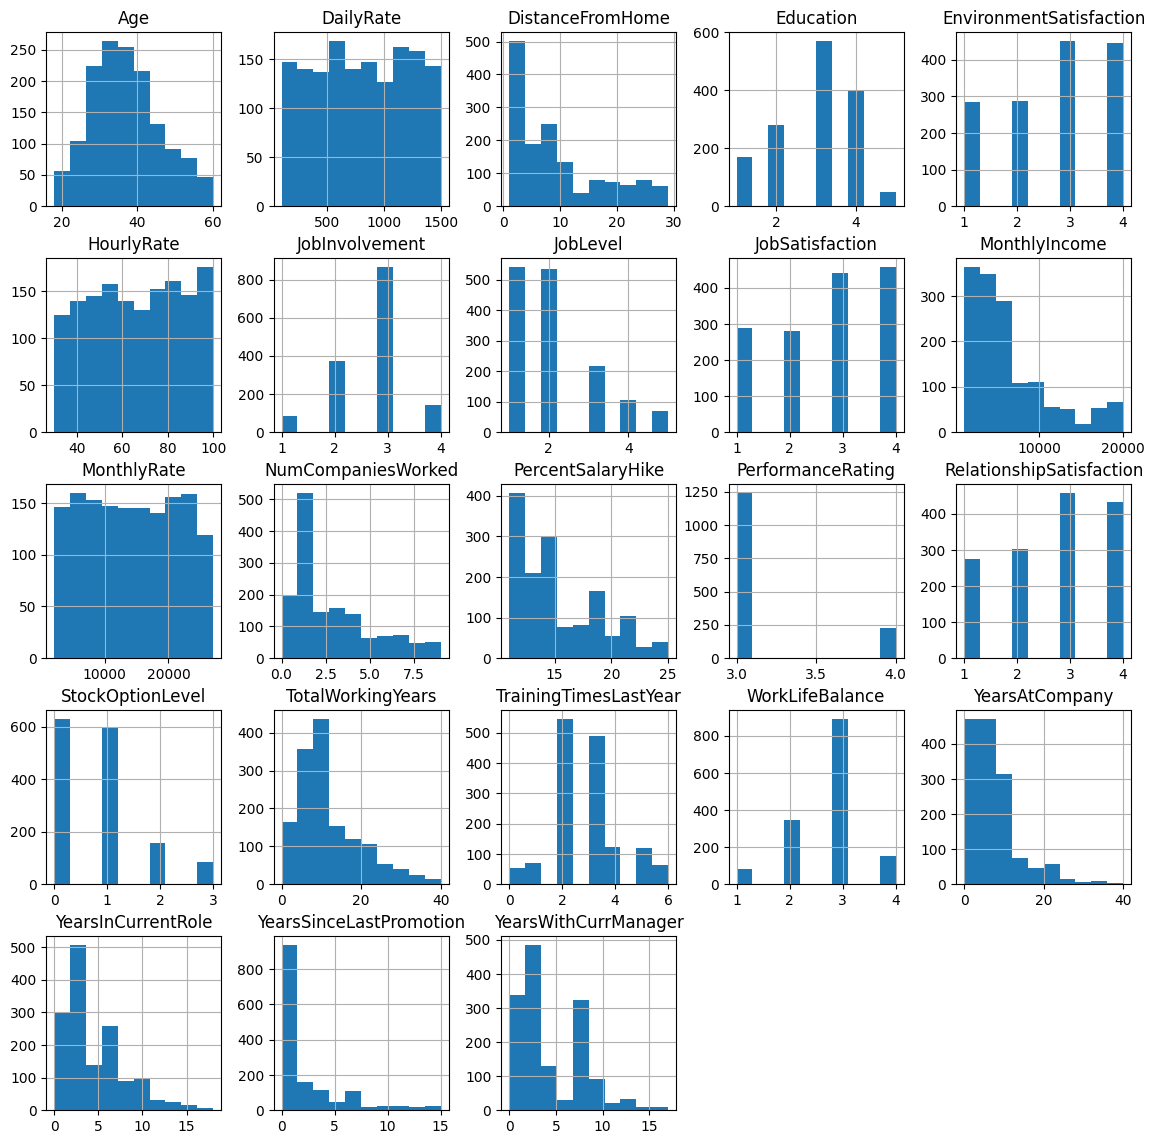

In [33]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

In this important project, the analysis of various factors related to employee attrition is presented. The variable "Age" follows a normal distribution with an average of 37 years, and it shows a positive correlation with JobLevel and Education, indicating that older employees tend to have higher job levels and more education. "DailyRate" exhibits a fairly uniform distribution with an average of 800, suggesting that employees with lower daily rates and lower monthly wages are more likely to attrite. "DistanceFromHome" displays a right-skewed distribution, indicating that most employees live close to their workplace, but those who have to travel a longer distance from home are more prone to attrition. The "HourlyRate" variable demonstrates almost uniform distribution, with no significant impact on attrition. "MonthlyIncome" is highly right-skewed, with a few employees earning substantially more than others, and it is strongly correlated with Job Level. "MonthlyRate" displays a uniform distribution, suggesting it has minimal influence on attrition. "NumCompaniesWorked" reveals that employees, on average, have worked at 2.5 companies, with most having experience at only one company, although there are outliers who have worked at 9 companies. "PercentSalaryHike" demonstrates a right-skewed distribution, showing a correlation with performance rating, indicating that a lower salary hike can contribute to attrition. "TotalWorkingYears" shows a significant right skew and contains outliers. "YearsAtCompany," "YearsInCurrentRole," and "YearsWithCurrManager" are all right-skewed variables with a few outliers. In terms of categorical features, "BusinessTravel" reveals that the majority of employees (71%) rarely travel, while "Department" is dominated by the R&D department (65% of employees). "EducationField" indicates that the Life Science field has the highest representation (41%). Gender distribution shows that 60% are male and the remaining 40% are female. Among job roles, sales executives account for 22%, followed by research scientists at 20%. Regarding marital status, 46% of employees are married, while 32% are single. "OverTime" reveals that only 29% of employees are willing to work overtime, and among them, there is a higher probability of attrition (approximately 35%). Finally, it is worth noting that there is an imbalance in the data, with only 16% of employees experiencing attrition while the majority do not.

**Bivariate Analysis**



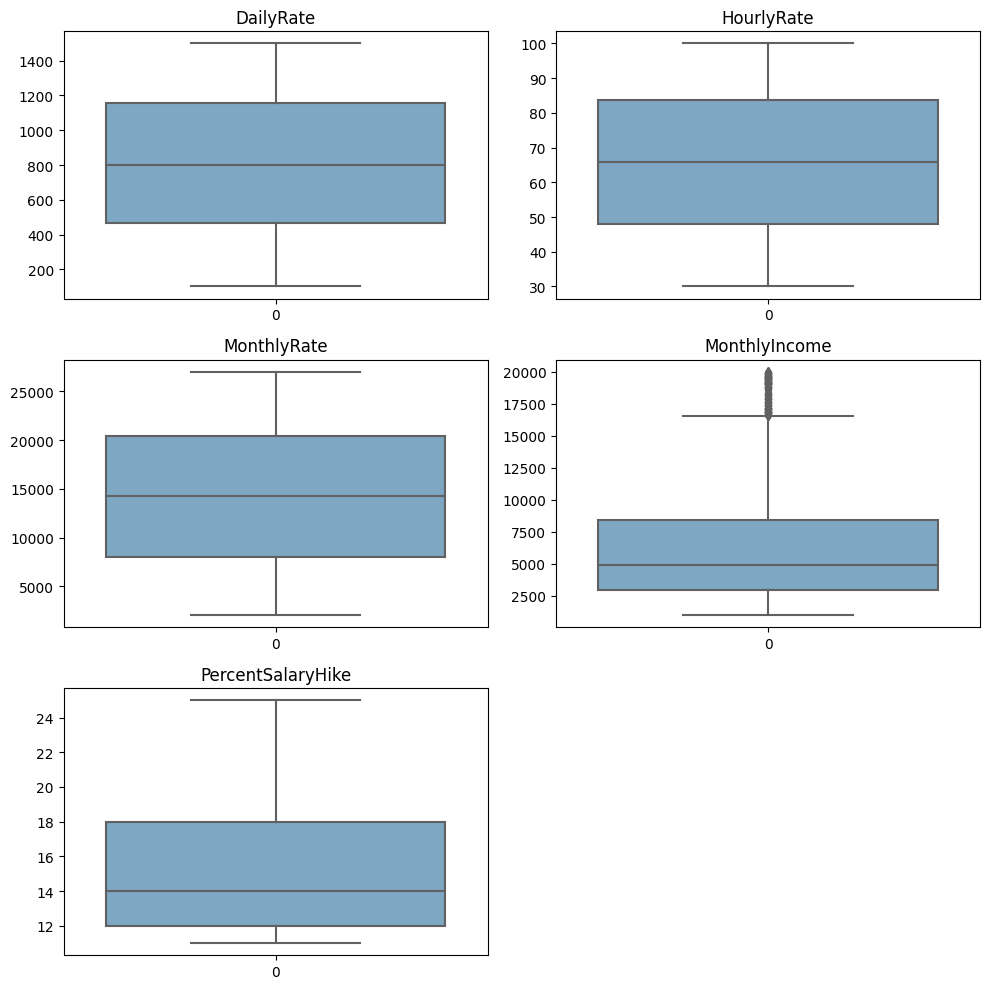

In [35]:
cols = data[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome','PercentSalaryHike']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* **Attrition vs Earnings of employee**:

In this significant project, it is observed that employees with lower daily rates and lower monthly wages are more prone to attrition. This finding suggests that individuals with relatively lower compensation may be more inclined to leave the organization. On the other hand, the monthly rate and hourly rate do not appear to have a significant impact on attrition, indicating that these factors may not play a substantial role in the decision-making process of employees when it comes to leaving the company. Additionally, it is observed that a lower salary hike also contributes to the likelihood of attrition. This implies that when employees receive smaller increases in their salary, they may be more inclined to consider alternative opportunities. Overall, these insights shed light on the relationship between various compensation-related factors and the occurrence of attrition within the organization, providing valuable information for effective talent retention strategies.

* **Attrition vs Years working in company**

In this research project, it is evident that employees who have shorter tenure in the company, in their current roles, or with a specific manager are more likely to experience attrition. The duration of an employee's stay at the company, their tenure in a particular role, and their relationship with a manager seem to play significant roles in determining the likelihood of attrition. On the other hand, the analysis suggests that training does not have a substantial impact on attrition rates. This finding highlights the importance of considering factors such as employee tenure and managerial relationships when studying attrition patterns, while indicating that training programs may need to be further evaluated or supplemented to effectively address attrition concerns.
    
* **Attrition vs Previous job roles**

In this research project, it is found that employees who have a higher number of previous work experiences tend to exhibit a higher tendency to switch jobs, resulting in attrition. On the other hand, employees who experience attrition typically have fewer years of overall work experience. These findings suggest a correlation between the number of companies an employee has worked for and their likelihood of job switching, as well as the association between attrition and a relatively lower level of overall work experience. These observations provide valuable insights into the factors influencing attrition in the context of employee work histories and can contribute to a better understanding of employee retention and career progression.

* **Attrition vs Age and Education**

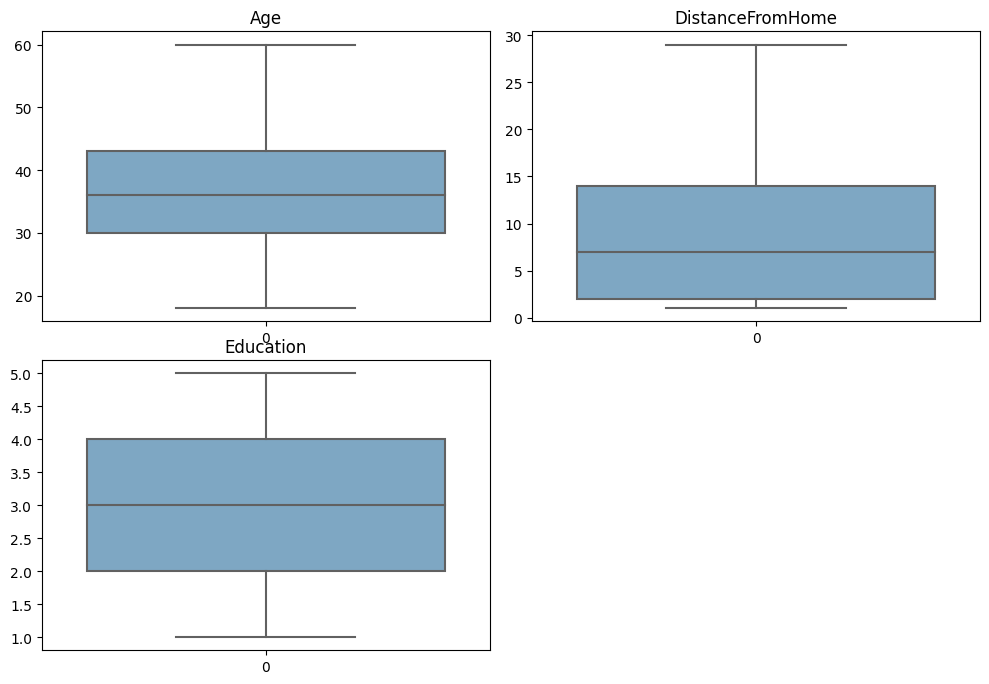

In [125]:
cols = data[['Age','DistanceFromHome','Education']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In this significant project, it is observed that employees who have to commute longer distances from their residences tend to have a higher attrition rate. This finding suggests that the distance an employee has to travel to work may play a role in their decision to leave the organization. Furthermore, the analysis indicates that there is no discernible difference in terms of age and education between employees who voluntarily leave (attriting) and those who choose to stay (non-attriting). These insights shed light on the potential impact of commuting distance on employee attrition, highlighting the need for organizations to consider factors related to transportation and work-life balance in order to mitigate attrition rates and retain valuable talent.

*  **Attrition vs Department, Job Role and Education**

In this important project, it is observed that the R&D department has the majority of employees, and they exhibit the lowest probability of attrition. On the other hand, both the Sales and HR departments show similar attrition probabilities. The Sales Executives have a relatively high attrition probability of over 40%, while Laboratory Technicians and Human Resource personnel also demonstrate significant probabilities of attrition. However, it is worth noting that Research Directors, Manufacturing Directors, Healthcare Representatives, and Managers have attrition probabilities that are much lower than the average probability of 16%. Additionally, it is observed that 25% of employees with an educational background in human resources are prone to attrition. Moreover, attrition probabilities are found to be high among employees with marketing and technical degrees. These findings shed light on the varying attrition probabilities within different departments and educational backgrounds, emphasizing the importance of addressing retention strategies for specific employee groups.


In this research project, several noteworthy findings have been identified. Firstly, there is a clear relationship between employee satisfaction with their work environments and attrition. Employees who express low satisfaction are more likely to leave the organization. In fact, the analysis reveals a significant probability, approximately 40%, of attrition among those with low ratings for environment satisfaction.

Another critical factor influencing attrition is job involvement. It appears to be a strong indicator, as higher levels of job involvement correspond to a greater likelihood of employees staying with the organization. Conversely, employees dissatisfied with their job involvement exhibit a substantial probability, approximately 55%, of attrition, particularly those who provided low ratings of 0 and 1. Further exploration into the collection methodology for this variable would offer valuable insights into these findings.

Additionally, the study uncovered a relationship between salary hikes and performance ratings. It is observed that performance ratings, specifically Excellent (3) and Outstanding (4), are associated with attrition. Understanding the reasons behind this phenomenon and devising strategies to retain employees with such high performance ratings require further investigation and attention.

By addressing these findings and exploring potential solutions to enhance employee satisfaction, job involvement, and retention strategies for high-performing individuals, organizations can mitigate attrition rates and create a more stable and productive work environment.

Attrition    No  Yes   All
OverTime                  
All        1233  237  1470
Yes         289  127   416
No          944  110  1054
------------------------------------------------------------------------------------------------------------------------


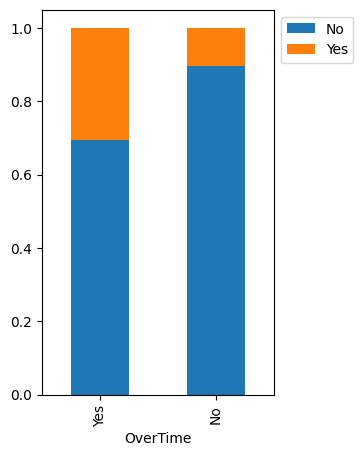

In [37]:
stacked_barplot(data,"OverTime","Attrition")

 it is observed that there is a correlation between employee attrition and overtime work. The data suggests that employees who work overtime are more likely to experience attrition. Specifically, the analysis reveals that there is approximately a 35% probability of attrition among employees who engage in overtime work. These findings highlight the potential impact of excessive work hours on employee retention within the organization.

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* This is done using the `stratify` parameter in the train_test_split function.

In [38]:
X = data.drop(['Attrition'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [39]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(1029, 44) (441, 44)


In [40]:
y.value_counts(1)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [41]:
y_test.value_counts(1)

0    0.839002
1    0.160998
Name: Attrition, dtype: float64

## Model evaluation criterion:

The evaluation of a model's performance is crucial in predicting employee attrition. In this context, there are two possible scenarios for making predictions: either predicting that an employee will attrite when they do not, or predicting that an employee will not attrite when they actually do. Both scenarios carry their own importance, but the latter case is particularly significant. It is more critical to identify employees who are at risk of attrition but are predicted as non-attrition cases, as this means potentially losing valuable employees or assets.

To mitigate this loss, the focus should be on reducing false negatives. The company aims to maximize the recall metric, as a higher recall means a greater chance of minimizing false negatives. By increasing recall or minimizing false negatives, the model becomes better at identifying true positives (employees at risk of attrition), specifically class 1 in the classification. This enables the company to take proactive measures, such as providing incentives, to control the attrition rate, particularly among top performers. In doing so, the company optimizes the overall project cost by retaining the best talent and mitigating the potential loss associated with employee attrition.

In [42]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [43]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

In our project, we will construct the model using the DecisionTreeClassifier function with the default 'gini' criterion for splitting. However, it is crucial to consider the potential bias that can arise when one class dominates the dataset. For instance, if Class A has a frequency of 10% while Class B has a frequency of 90%, the decision tree may become biased towards the dominant class, in this case, Class B. To address this issue, we can provide a weight dictionary {0: 0.17, 1: 0.83} to the model, which assigns weights to each class. By specifying a higher weight for Class 1, the decision tree will give it more importance during the model building process. It's important to note that adjusting the class weights is a hyperparameter in the decision tree classifier, allowing us to mitigate potential biases and enhance the model's performance.

In [44]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [45]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

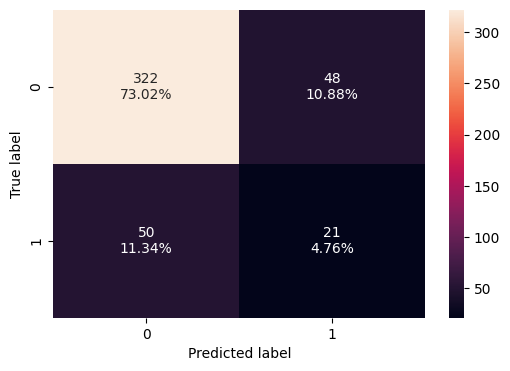

In [46]:
confusion_matrix_sklearn(dtree, X_test, y_test)

**Confusion Matrix -**


1. True Positive: The model correctly predicted that an employee will attrite, and this prediction aligned with the actual observation. This outcome represents a situation where the model accurately identifies employees who are likely to leave the organization (observed=1, predicted=1).

2. False Positive: The model incorrectly predicted that an employee will attrite, despite the actual observation indicating that the employee did not leave. This outcome represents a situation where the model falsely identifies employees as likely to leave when they actually do not (observed=0, predicted=1).

3. True Negative: The model correctly predicted that an employee will not attrite, and this prediction matches the actual observation. This outcome represents a situation where the model accurately identifies employees who are unlikely to leave the organization (observed=0, predicted=0).

4. False Negative: The model incorrectly predicted that an employee will not attrite, while the actual observation indicates that the employee did leave the organization. This outcome represents a situation where the model fails to identify employees who are likely to leave (observed=1, predicted=0).



In [47]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [48]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision   F1
0  0.777778  0.295775   0.304348  0.3


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

### Bagging Classifier

In [49]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

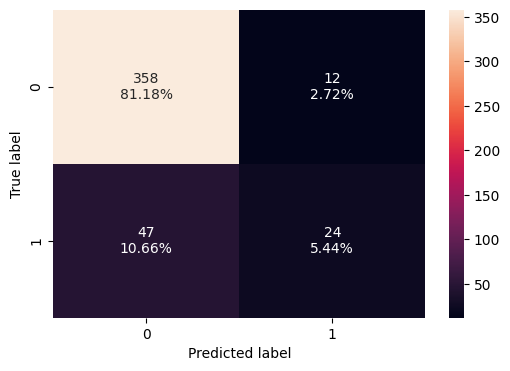

In [50]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [51]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985423  0.921687   0.987097  0.953271


In [52]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.866213  0.338028   0.666667  0.448598


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

**Bagging Classifier with weighted decision tree**

In [53]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

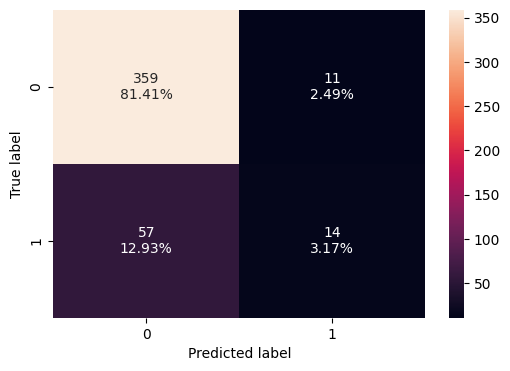

In [54]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [55]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.987366  0.927711   0.993548  0.959502


In [56]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.845805  0.197183       0.56  0.291667


* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of recall.

### Random Forest

In [57]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

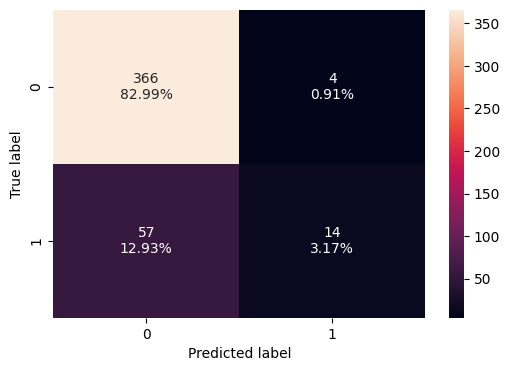

In [58]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [59]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [60]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.861678  0.197183   0.777778  0.314607


* Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall.

**Random forest with class weights**

In [61]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

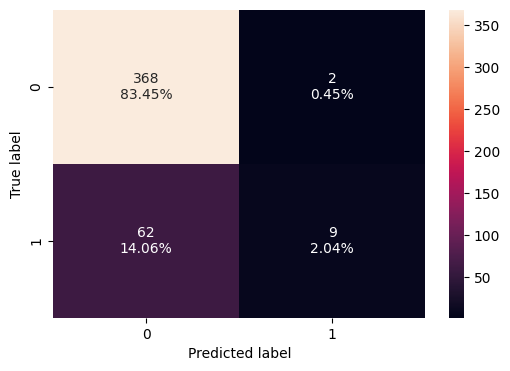

In [62]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [63]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [64]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.854875  0.126761   0.818182  0.219512


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

### Tuning Models

### Using GridSearch for Hyperparameter tuning model

In this research project, the process of hyperparameter tuning is acknowledged to be challenging due to the absence of a direct calculation for quantifying the impact of changing hyperparameter values on reducing model loss. To address this, an experimental approach, such as grid search, is employed. Grid search is a technique that systematically explores various combinations of hyperparameter values to identify the optimal configuration. This exhaustive search is conducted on a specific set of parameter values for the model. By leveraging cross-validation, the parameters of the estimator or model are optimized through a grid-search process across the defined parameter grid. This approach aids in finding the most suitable hyperparameter values to enhance the model's performance and minimize loss, supporting the objectives of the project.

**Tuning Decision Tree**

In [65]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15, None],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=2, random_state=1)

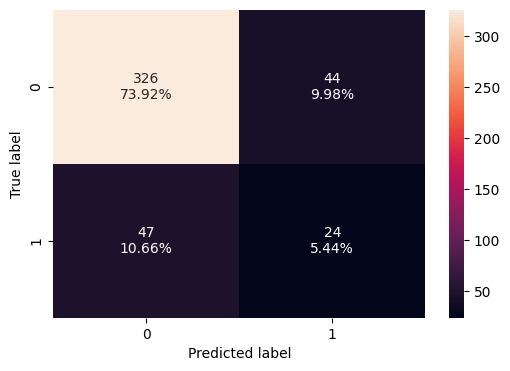

In [66]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [67]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.956268  0.759036   0.961832  0.848485


In [68]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.793651  0.338028   0.352941  0.345324


* Overfitting in decision tree has reduced but the recall has also reduced.

**Tuning Bagging Classifier**

In [69]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [70]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.7, n_estimators=5, random_state=1)

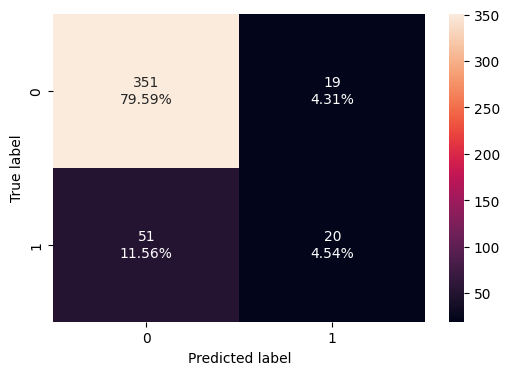

In [71]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [72]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.981535  0.909639   0.974194  0.94081


In [73]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0   0.84127  0.28169   0.512821  0.363636


* Recall has improved but the accuracy and precision of the model has dropped drastically which is an indication that overall the model is making many mistakes.

**Tuning Random Forest**

In [74]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.7, min_samples_leaf=2,
                       n_estimators=110, random_state=1)

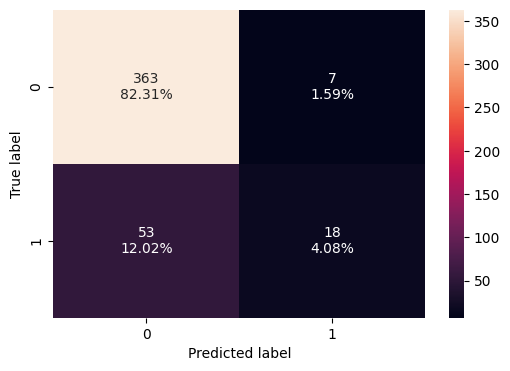

In [75]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [76]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.965986  0.789157        1.0  0.882155


In [77]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision     F1
0  0.863946  0.253521       0.72  0.375


* Random forest after tuning has given same performance as un-tuned random forest.

### Comparing all the models

In [78]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,1.0,0.985423,0.987366,1.0,1.0,0.956268,0.981535,0.965986
Recall,1.0,0.921687,0.927711,1.0,1.0,0.759036,0.909639,0.789157
Precision,1.0,0.987097,0.993548,1.0,1.0,0.961832,0.974194,1.000000
F1,1.0,0.953271,0.959502,1.0,1.0,0.848485,0.940810,0.882155


In [79]:
# training performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,0.777778,0.866213,0.845805,0.861678,0.854875,0.793651,0.841270,0.863946
Recall,0.295775,0.338028,0.197183,0.197183,0.126761,0.338028,0.281690,0.253521
Precision,0.304348,0.666667,0.560000,0.777778,0.818182,0.352941,0.512821,0.720000
F1,0.300000,0.448598,0.291667,0.314607,0.219512,0.345324,0.363636,0.375000


In the project, it is observed that the decision tree model showed satisfactory performance on both the training and test sets. However, the bagging classifier, which is an ensemble method, demonstrated better performance compared to the decision tree model. This improvement suggests that combining multiple decision trees can enhance predictive accuracy. Interestingly, the random forest model, which is a specific type of bagging ensemble, performed equally well with default parameters compared to when hyperparameter tuning was applied. It is important to note that the final results of the random forest model highly depend on the specific parameters that were checked and selected during the tuning process. There is a possibility that further exploration and optimization of parameters using techniques like GridSearchCV may lead to even better performance. This implies that the random forest model has the potential to achieve higher accuracy by fine-tuning its parameters.

### Feature importance of Random Forest

In [80]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
MonthlyIncome                      0.072333
DistanceFromHome                   0.051735
TotalWorkingYears                  0.050443
Age                                0.049937
MonthlyRate                        0.048326
DailyRate                          0.048236
HourlyRate                         0.047267
YearsAtCompany                     0.045796
OverTime_Yes                       0.037069
NumCompaniesWorked                 0.036616
JobSatisfaction                    0.034282
PercentSalaryHike                  0.033113
StockOptionLevel                   0.032251
EnvironmentSatisfaction            0.029880
JobInvolvement                     0.028935
TrainingTimesLastYear              0.027960
YearsWithCurrManager               0.027956
YearsInCurrentRole                 0.027014
WorkLifeBalance                    0.026869
YearsSinceLastPromotion            0.021830
RelationshipSatisfaction           0.020824
Education                       

In [81]:
feature_names = X_train.columns

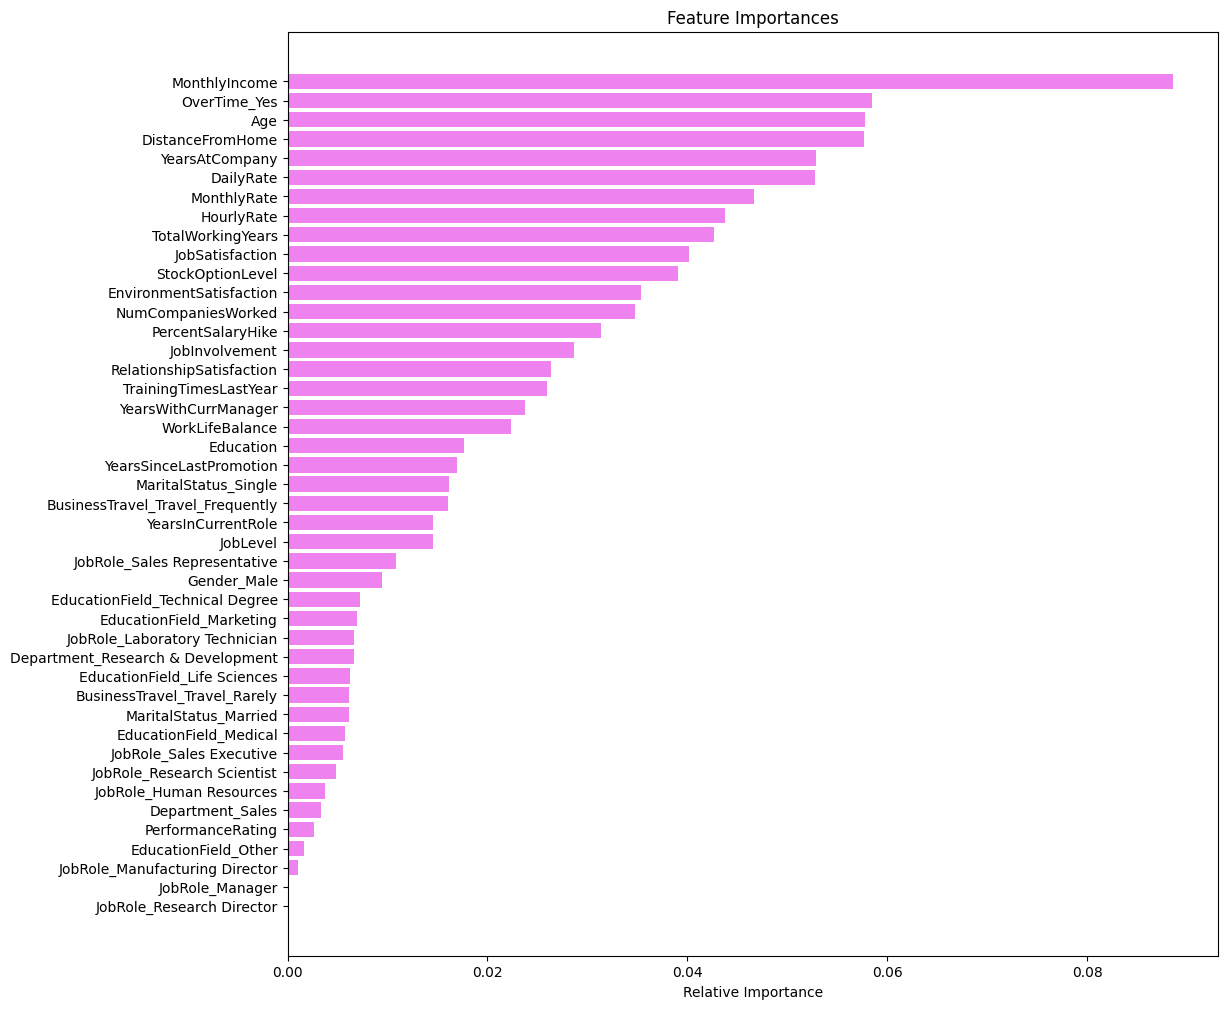

In [82]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* In this project, the analysis revealed that monthly income emerged as the most influential feature in predicting the outcome, followed by overtime, daily rate, and age. These findings emphasize the significance of individuals' monthly income as a key determinant in the prediction model. Additionally, the inclusion of overtime, daily rate, and age as important contributing factors further underscores their role in shaping the predicted outcome. These results provide valuable insights into the relative importance of these features and their potential impact on the prediction task, highlighting the importance of considering factors related to income, work patterns, and age when making predictions in this context.

## Business Insights and Recommendations
In this important project, a predictive model has been successfully developed to address the challenges of employee attrition. The model provides valuable insights to the company in multiple ways. Firstly, it enables the identification of employees who are at risk of attrition, allowing the company to proactively take measures to retain these employees. Secondly, the model facilitates the exploration of the drivers of attrition, helping the company gain a deeper understanding of the factors influencing employee turnover. Lastly, armed with the insights from the model, the company can implement targeted actions and develop more effective retention policies, ultimately striving towards building a more engaged and satisfied workforce. The developed predictive model serves as a valuable tool for the company in its efforts to mitigate attrition and foster a positive work environment.

In this important project, the analysis reveals several factors that contribute to employee attrition. The findings indicate that factors such as monthly income, overtime, age, distance from home, and work-related travel frequency are significant drivers of attrition.

The analysis shows that employees with lower monthly income are more likely to attrite. It is crucial for the company to ensure that all employees are fairly compensated according to industry standards to mitigate attrition caused by salary disparities.

Secondly, employees who are required to work overtime exhibit a higher attrition rate. To retain such employees, the company could consider providing additional incentives or benefits to acknowledge their extra efforts and dedication.

Furthermore, younger employees tend to have a higher attrition rate. To address this, the company can create a supportive and conducive environment for new joiners, offering them opportunities for growth and advancement in their careers.

Another significant factor contributing to attrition is the distance from home to the workplace. Employees with longer commuting distances are more likely to attrite. The company can explore options such as providing transportation facilities or implementing flexible work arrangements to ease the commuting burden and improve employee satisfaction.

Lastly, the analysis reveals that as the frequency of work-related travel increases, the attrition rate also rises. To mitigate this, the company should carefully manage work-related travel demands and seek alternative solutions or support systems to minimize the impact on employee retention.

Based on these findings, the company can proactively address attrition by implementing strategies such as competitive compensation, incentivizing overtime work, fostering a supportive work environment for younger employees, facilitating convenient commuting options, and managing work-related travel demands effectively.

It is evident that training does not appear to have a substantial effect on attrition within the company. This finding necessitates further investigation, as understanding the lack of impact of training on employee retention can provide valuable insights for optimizing cost planning strategies. Additionally, it is observed that employees with extensive experience and those who have been with the company for many years tend to exhibit greater loyalty and have lower attrition rates. On the other hand, the Sales department exhibits the highest attrition rate, indicating the need for deeper research to identify the underlying issues within this department. By delving into the challenges specific to the Sales department, the company can gain a better understanding of the factors contributing to attrition and implement targeted interventions to address and rectify the situation.

Our data collection method is proving to be effective in capturing important insights regarding employee attrition. By analyzing ratings provided by employees in categories such as Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, and Work-Life Balance, we have observed notable differences between attriting and non-attriting employees. These ratings serve as an initial indicator, highlighting that lower ratings are associated with a higher likelihood of attrition. This understanding helps us identify potential dissatisfaction factors among employees, enabling us to take proactive measures to improve employee retention and satisfaction.

## <a id='link1'>Appendix</a>

### Univariate analysis

### Observations on Age

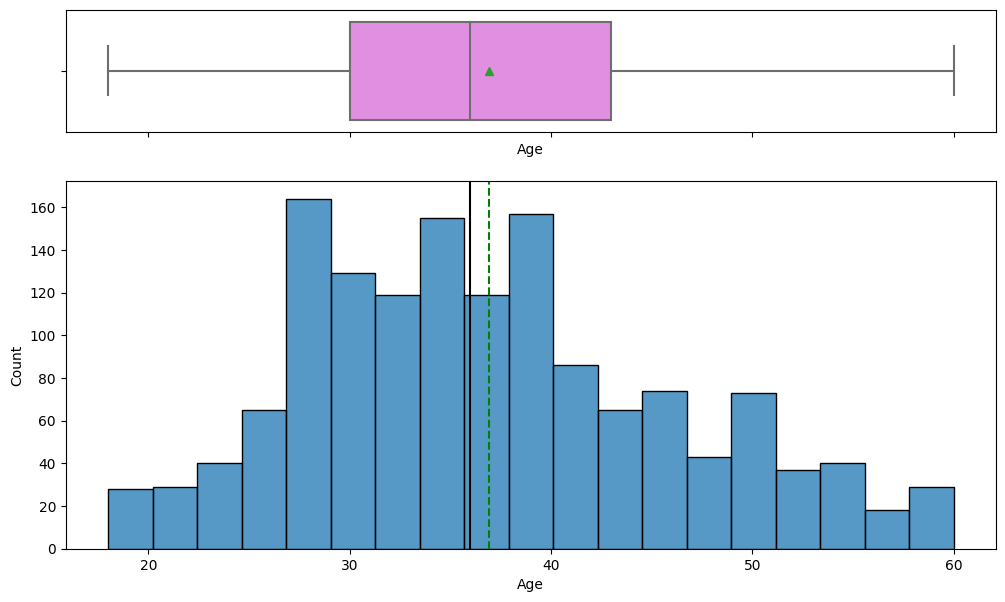

In [83]:
histogram_boxplot(data,'Age')

* The distribution of the Age variable appears to be approximately normal, with a slight tendency towards right skewness.

### Observations on DailyRate

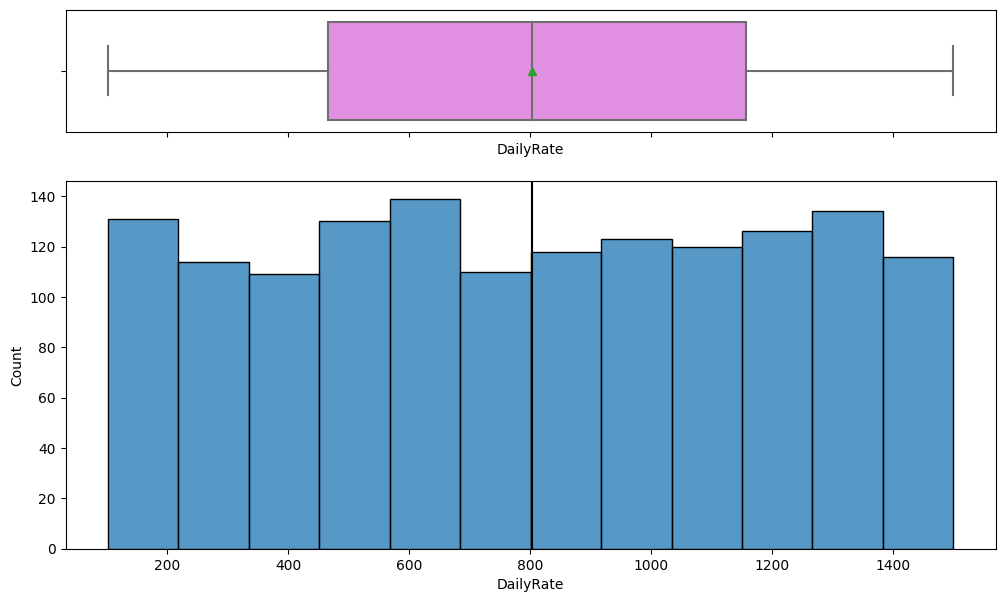

In [84]:
histogram_boxplot(data,'DailyRate')

* It is observed that the daily rate exhibits a relatively uniform distribution, with a mean and median both centered around 800. This finding indicates that the values of the daily rate are evenly spread out across the dataset, with no significant skewness or concentration towards specific values. The uniform distribution suggests that the occurrence of different daily rates is approximately equal, without any notable peaks or outliers. This observation regarding the distribution of the daily rate is crucial for understanding the pricing patterns and trends in the project, providing valuable insights into the rates charged on a daily basis.

### Observations on DistanceFromHome

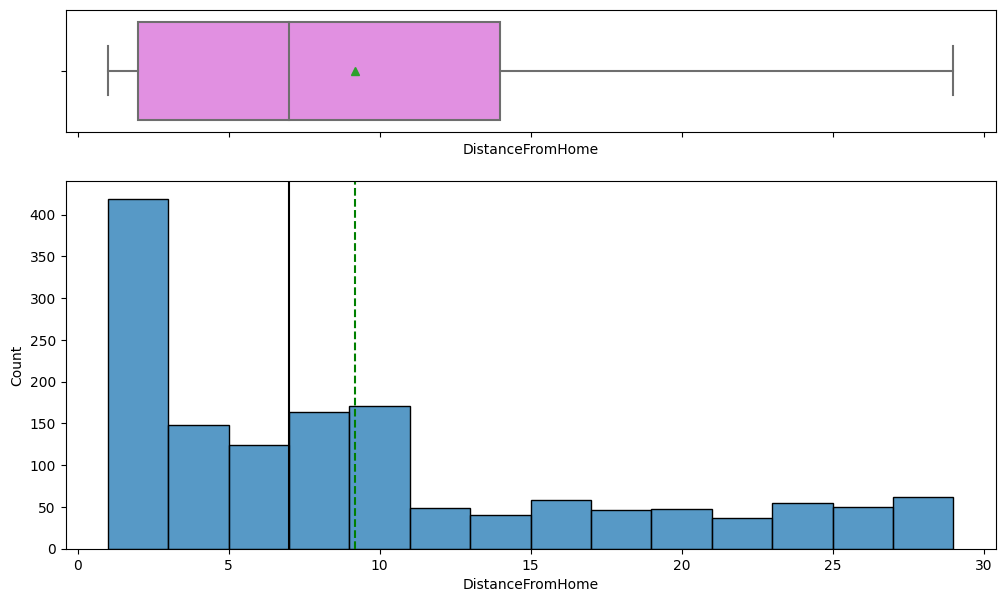

In [85]:
histogram_boxplot(data,'DistanceFromHome')

It is observed that the distribution of the data exhibits a right-skewed pattern. This implies that the majority of individuals reside in close proximity to their workplace, indicating a concentration of employees in the nearby area. However, it is also important to note that there are a few cases where employees live at a considerable distance from the workplace. This finding highlights the presence of individuals who commute from relatively distant locations. These observations contribute valuable insights into the spatial distribution of employees in relation to their residential and work areas, thereby providing a deeper understanding of the dynamics within the dataset.

### Observations on HourlyRate

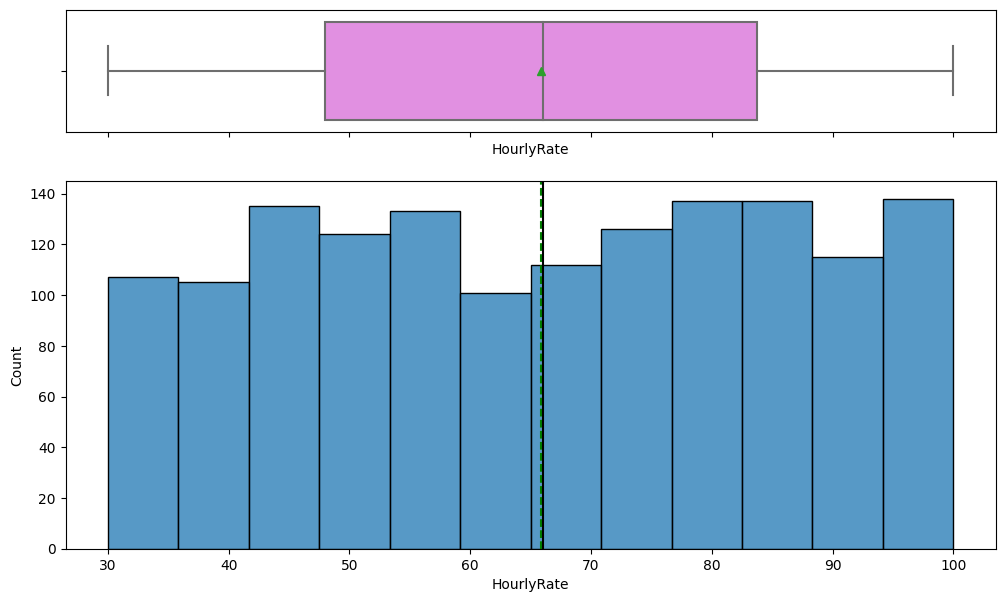

In [86]:
histogram_boxplot(data,'HourlyRate')

Consistent with the daily rate, the distribution of the hourly rate is also relatively even, with both the mean and median values centered around 65.

### Observations on MonthlyIncome

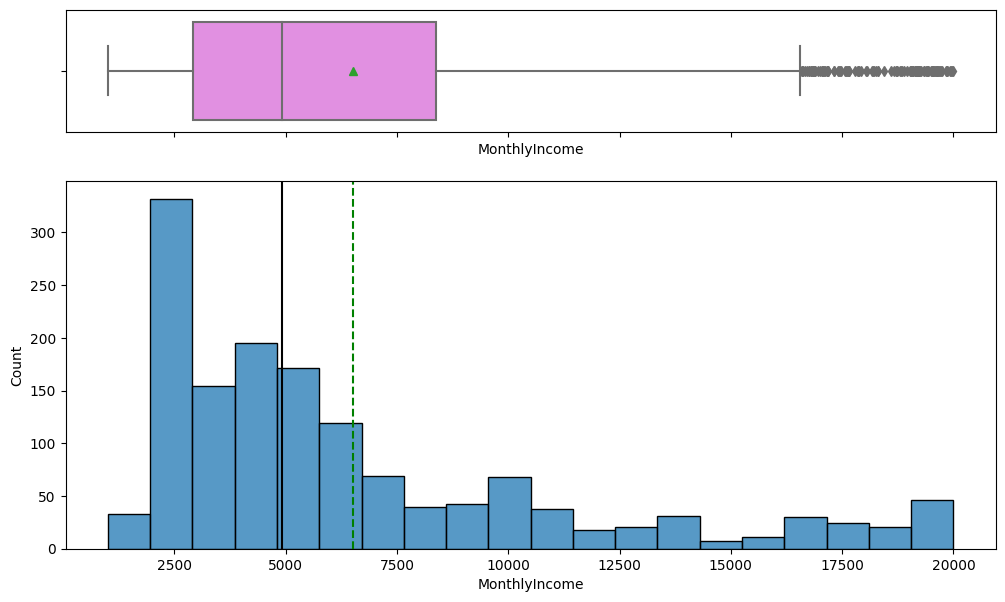

In [87]:
histogram_boxplot(data,'MonthlyIncome')

It can be observed that the income distribution within the unit follows a pattern commonly observed in many datasets, known as a right-skewed distribution. This implies that a majority of the employees have relatively lower incomes, while a small number of outliers earn significantly higher wages. These outliers are visible on the boxplot, confirming the presence of a few individuals with substantially higher earnings compared to the rest of the employees.

### Observations on MonthlyRate

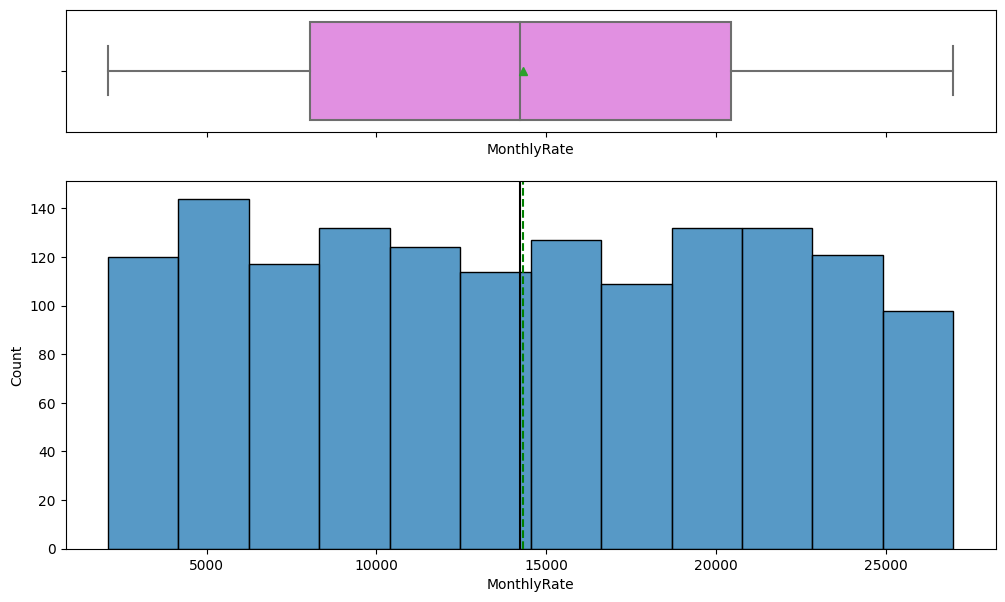

In [88]:
histogram_boxplot(data,'MonthlyRate')

An important observation is made regarding the distribution of the monthly rate variable. It is noted that the monthly rate exhibits a uniform distribution, with both the mean and median values being close to 14500. This finding suggests that the values of the monthly rate are evenly spread out across the range, without any significant skewness or clustering towards specific values. The uniform distribution of the monthly rate has implications for the understanding and analysis of this variable in the context of the project, providing valuable insights into the distributional characteristics of this important feature.

### Observations on NumCompaniesWorked

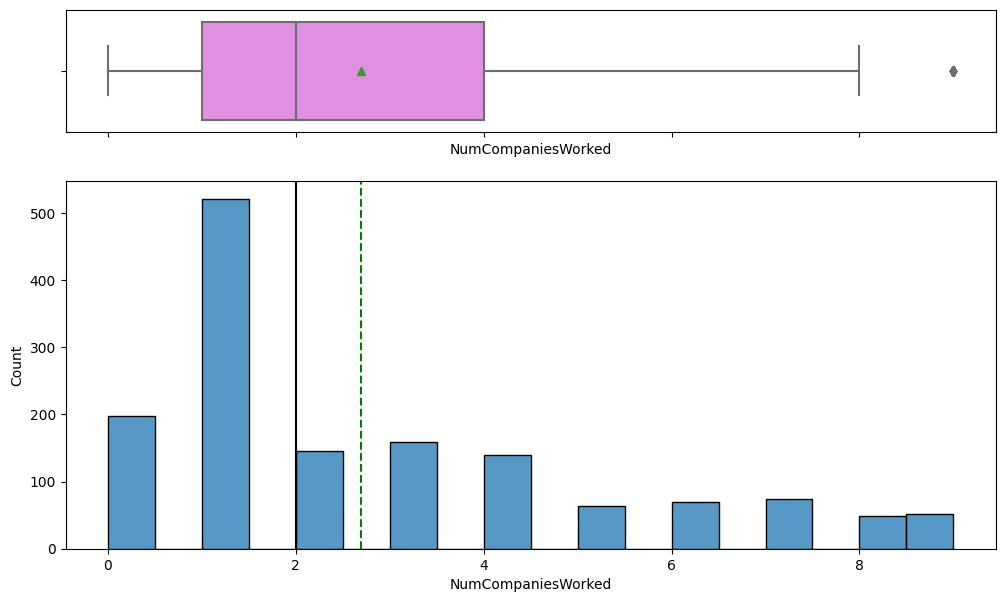

In [89]:
histogram_boxplot(data,'NumCompaniesWorked')

It was observed that the average number of companies worked by individuals was found to be 2.5, with a median value of 2. This indicates that, on average, individuals have gained professional experience in multiple organizations. However, the majority of individuals have worked at only one company, which suggests a trend of relatively stable employment among the study participants. It is noteworthy that there is one outlier employee who stands out with a record of working at 9 different companies, indicating a substantial level of professional mobility. Additionally, an interesting finding emerged, revealing that approximately 350 employees reported no previous work experience at other companies, which signifies that this particular variable provides insight into the number of companies employees have worked for before joining our organization. These observations shed light on the employment patterns and professional experiences of the participants, highlighting the significance of the number of companies worked for in their career trajectories.

### Observations on PercentSalaryHike

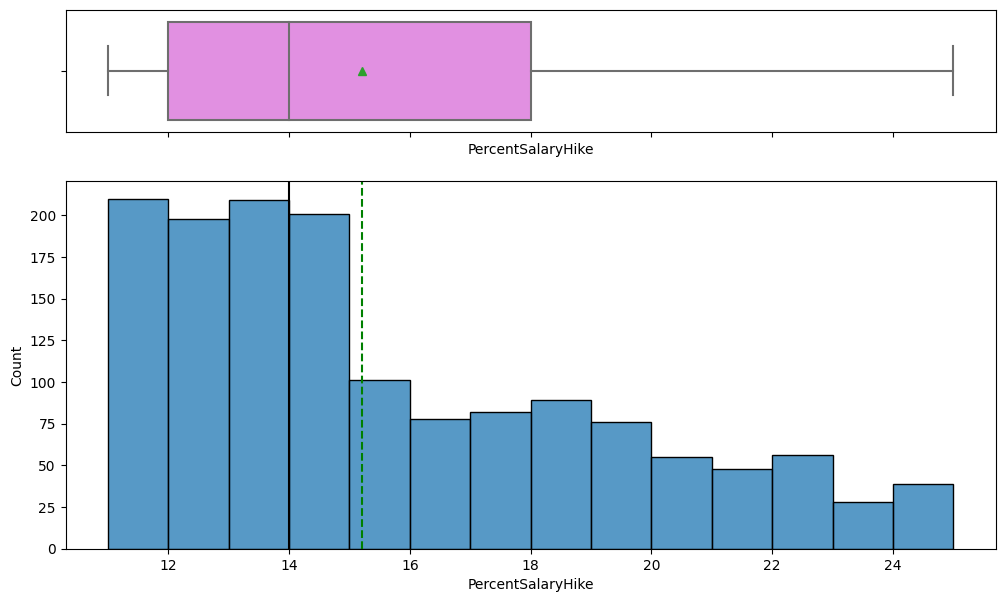

In [90]:
histogram_boxplot(data,'PercentSalaryHike')

It is observed that the distribution of salary hike is right skewed, indicating that the majority of employees tend to receive smaller salary increases compared to a few outliers who receive larger hikes. In the subsequent analysis, we plan to investigate whether the percentage of salary hike is influenced by factors such as performance rating or job level. Additionally, we calculated the mean percentage salary hike to be 15%, providing a baseline measure for understanding the average increase in salaries across the organization.

### Observations on TotalWorkingYears

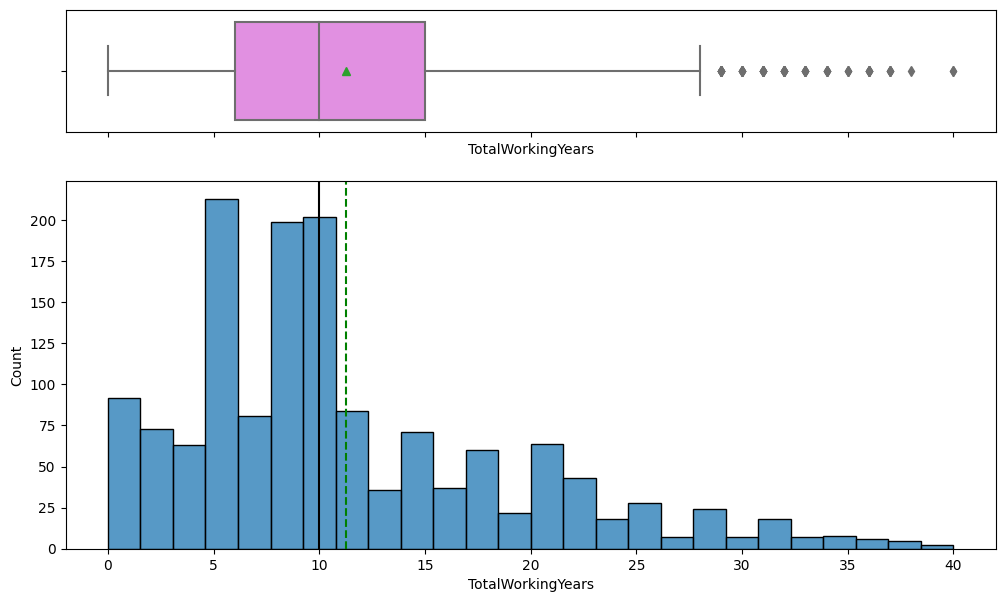

In [91]:
histogram_boxplot(data,'TotalWorkingYears')

It was noted that the distribution of employee age displayed a slight right skew, indicating a higher frequency of younger employees. On the other hand, the variable representing work experience exhibited a more pronounced right skew, indicating a higher concentration of employees with relatively shorter work experience. Moreover, the boxplot analysis revealed the presence of a few outliers within this variable, suggesting the existence of some extreme values that deviate from the overall distribution. These findings contribute valuable insights to the understanding of the age and work experience characteristics within the employee dataset, highlighting potential trends and exceptional cases that warrant further investigation.

### Observations on YearsAtCompany

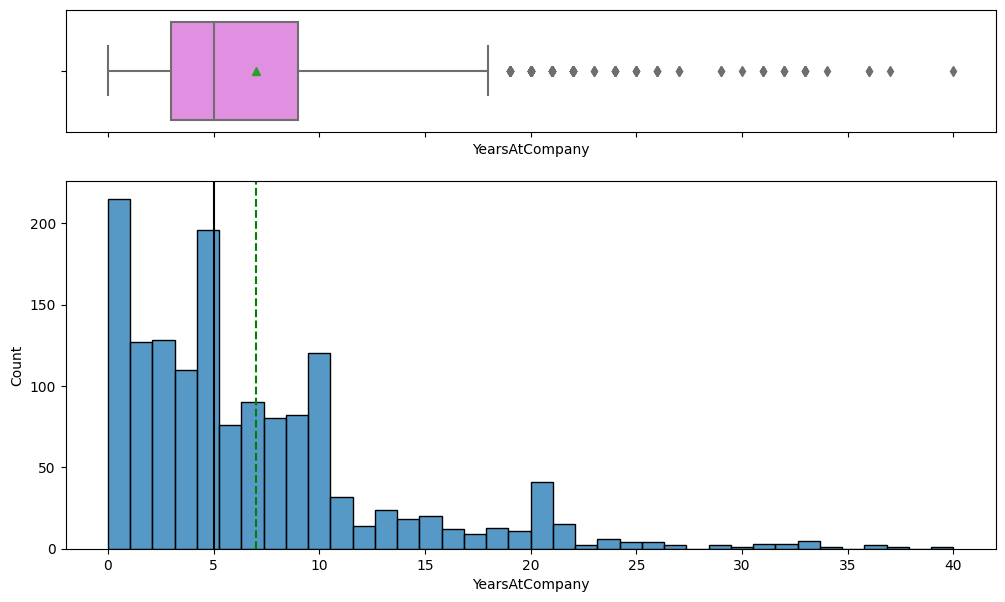

In [92]:
histogram_boxplot(data,'YearsAtCompany')

In the data analyzed for this important project, it is observed that there is a notable right skew, indicating a concentration of data towards higher values. This skewness suggests that there may be a subset of employees who exhibit exceptional loyalty and are less likely to leave the company. These employees, identified as outliers in the dataset, stand out due to their distinct characteristics and behaviors, which potentially contribute to their reduced propensity to attrite. These findings shed light on the unique dynamics within the workforce and highlight the significance of understanding and acknowledging the impact of these loyal outliers in the context of employee attrition.

### Observations on YearsInCurrentRole

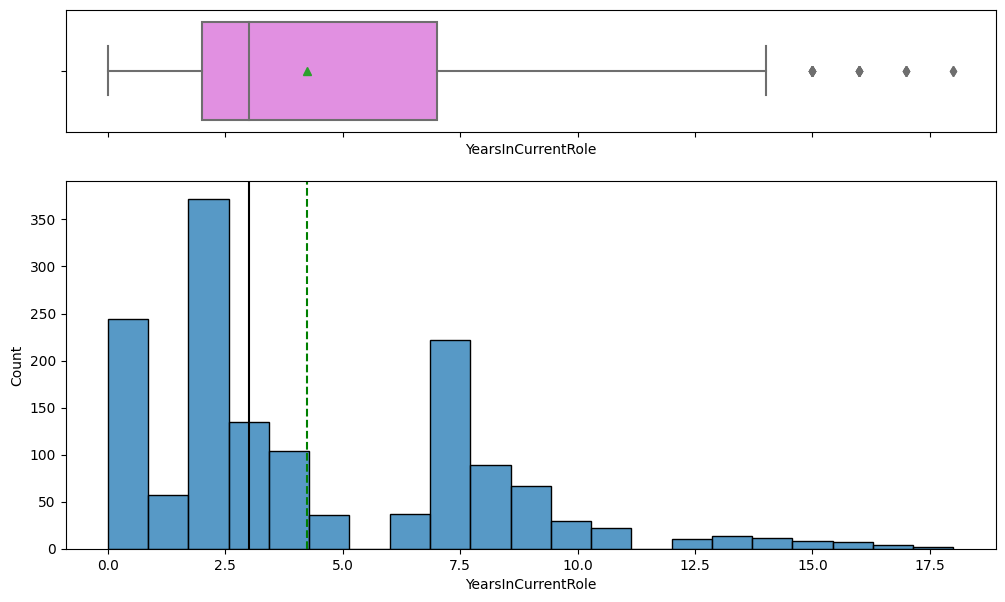

In [93]:
histogram_boxplot(data,'YearsInCurrentRole')

It is observed that the distribution of a certain variable exhibits three distinct peaks at values 0, 2, and 7. This suggests the presence of multiple modes or clusters within the data, indicating different groups or patterns in the variable. Additionally, upon examining the dataset, a few outliers are identified. These outliers are characterized by individuals who have remained in the same role for a duration exceeding 15 years. These outliers may represent unique cases or individuals with exceptional circumstances compared to the majority of the dataset. The presence of these outliers highlights the need for further investigation to understand the underlying factors contributing to their prolonged tenure in the same role.

### Observations on YearsInCurrentRole

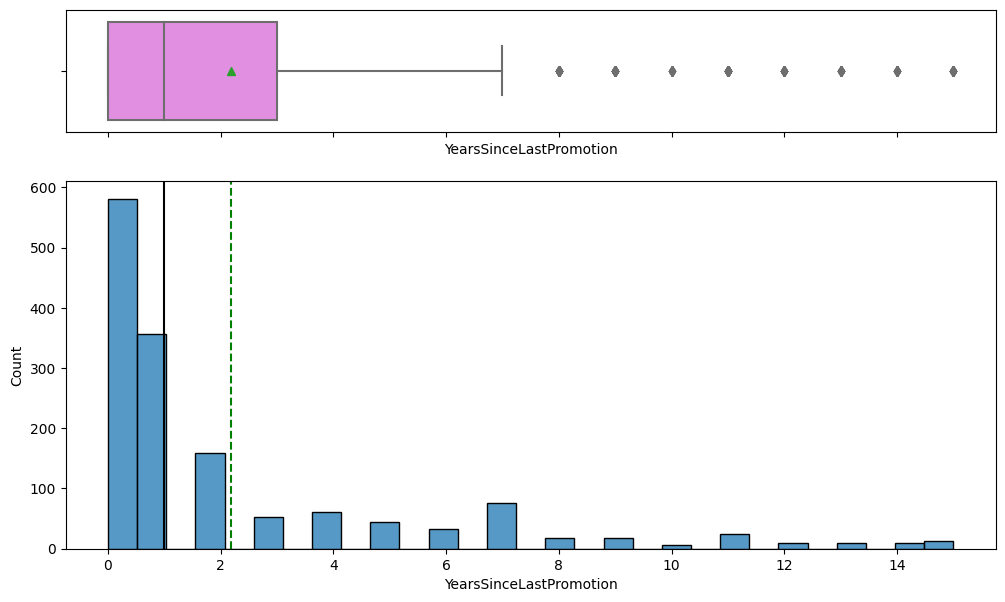

In [94]:
histogram_boxplot(data,'YearsSinceLastPromotion')

In this project of utmost significance, it is noted that within the positively skewed distribution, there exist a few anomalies that are likely attributed to individuals holding the highest positions within the organization. Furthermore, a substantial majority of employees have experienced a promotion within the preceding two-year period. It is particularly noteworthy that a value of 0 years since the last promotion is indicative of a considerable proportion of employees having been recently promoted. These observations provide valuable insights into the dynamics of promotions within the organization and shed light on the distribution of employee positions.

### Observations on YearsWithCurrManager

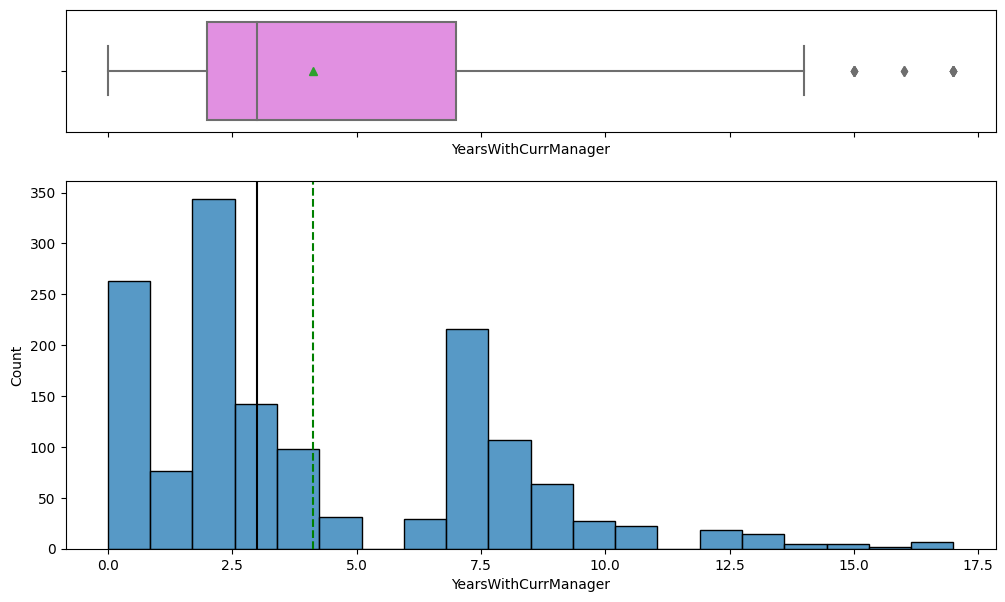

In [95]:
histogram_boxplot(data,'YearsWithCurrManager')

The distribution of the variable 'Years in current role' exhibits a striking similarity to the distribution of the variable under consideration. This observation is consistent with expectations and suggests a potential correlation between the two variables. However, it is worth noting the presence of a few outliers within this variable, which may indicate unusual or exceptional cases that deviate from the typical pattern. These outliers could potentially have an impact on the analysis and should be taken into account when interpreting the results.

### Observations on BusinessTravel

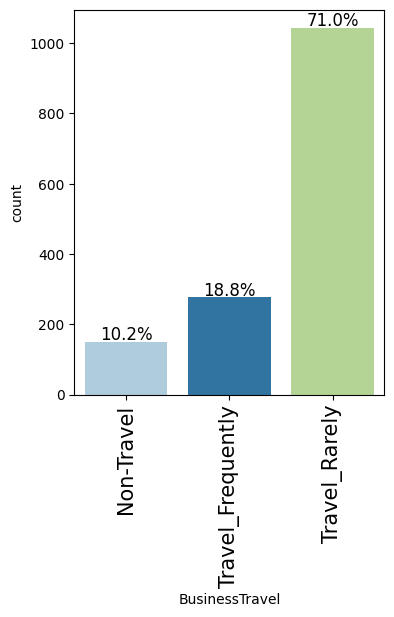

In [96]:
labeled_barplot(data, "BusinessTravel", perc=True)

* 71% of the employees have travel rarely and 18.8% employees have to travel frequently.

### Observations on Department

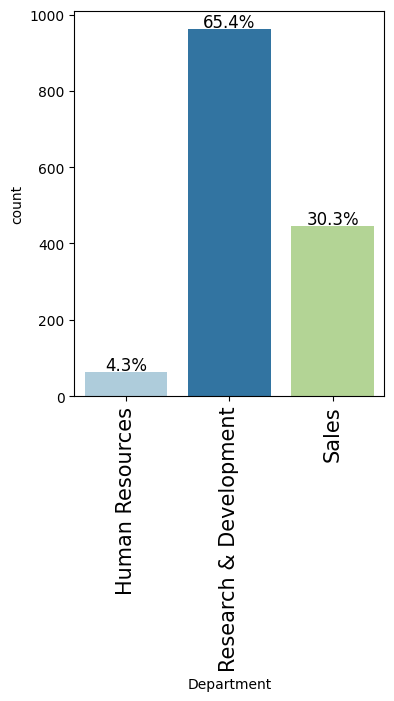

In [97]:
labeled_barplot(data, "Department", perc=True)

* 65.4% of employees in data are from R&D department followed by 30.3% in sales.

### Observations on EducationField

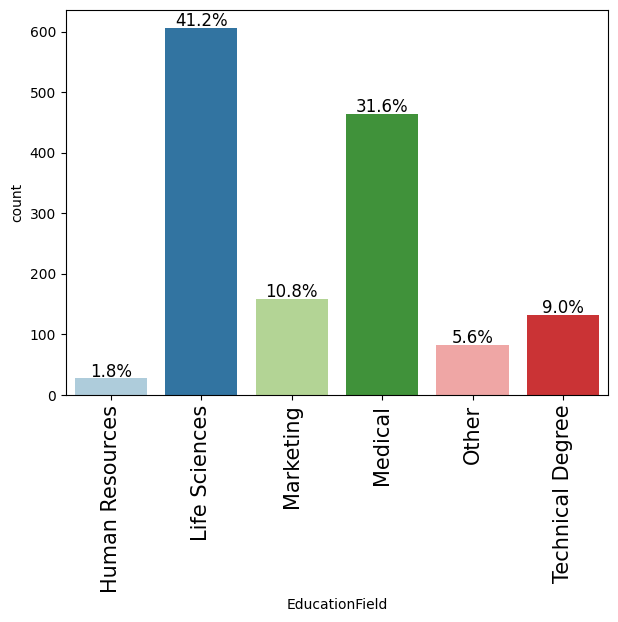

In [98]:
labeled_barplot(data, "EducationField", perc=True)

*In this project, it is found that a significant portion, specifically 41.2%, of the employees have a background in Life Sciences, making it the most prevalent field among the workforce. Following closely behind, 31.6% of the employees come from a medical background. These findings shed light on the composition of the employee base in relation to their educational or professional backgrounds, providing valuable insights into the expertise and knowledge areas represented within the project team.

### Observations on Gender

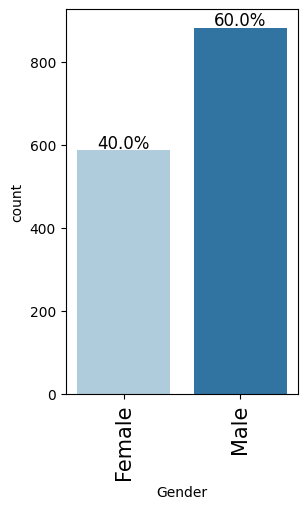

In [99]:
labeled_barplot(data, "Gender", perc=True)

* 60% of male employees and 40% of female employees.

### Observations on JobRole

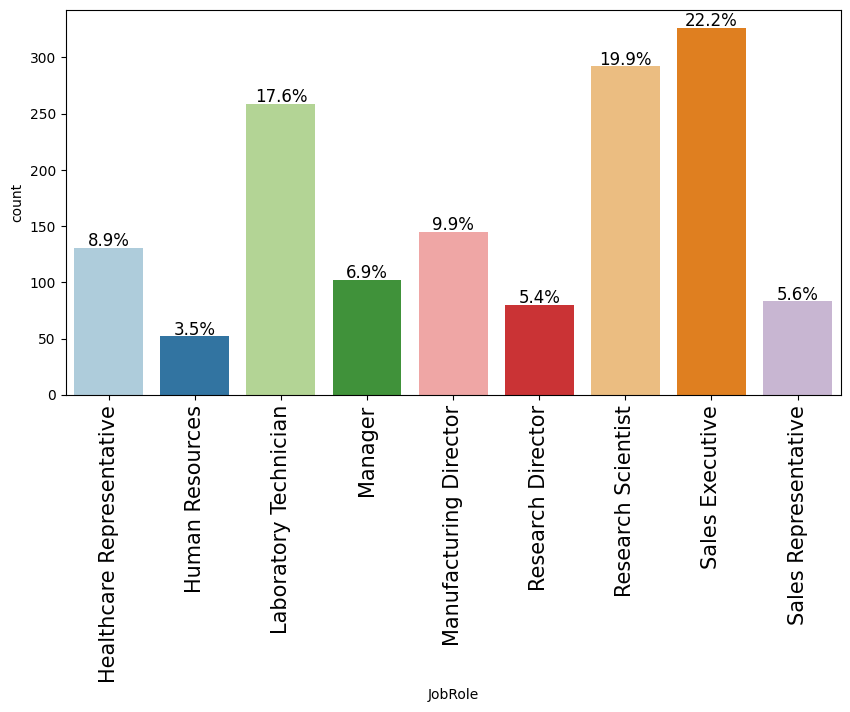

In [100]:
labeled_barplot(data, "JobRole", perc=True)

In the analyzed dataset, it is observed that a significant portion of employees, specifically 22.2%, hold the position of Sales Executives. This is closely followed by Research Scientists, accounting for approximately 20% of the total employee population. These findings shed light on the distribution of job roles within the organization under study and highlight the prominence of Sales Executives and Research Scientists among the employee categories.

### Observations on MaritalStatus

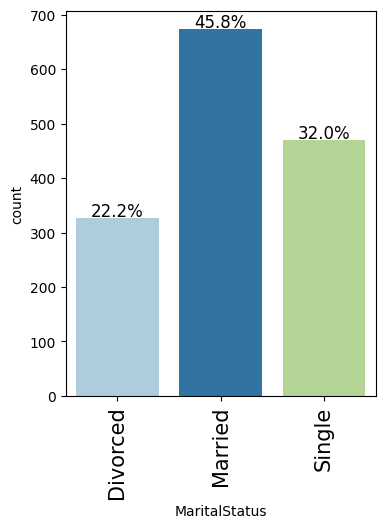

In [101]:
labeled_barplot(data, "MaritalStatus", perc=True)

In the dataset analyzed for this project, it was found that a significant portion of the employees, approximately 45.8%, are reported to be married. Additionally, around 32% of the employees were identified as singles. These findings provide valuable insights into the marital status distribution among the employee population under investigation.

### Observations on OverTime

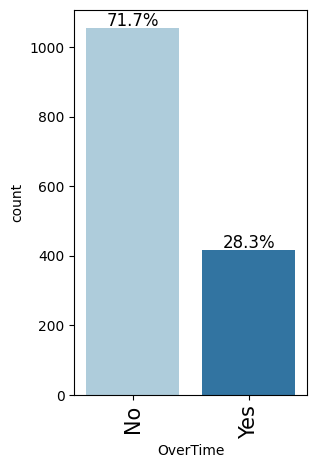

In [102]:
labeled_barplot(data, "OverTime", perc=True)

* 71.7% of the employees are not ready to work over time.

### Observations on Attrition

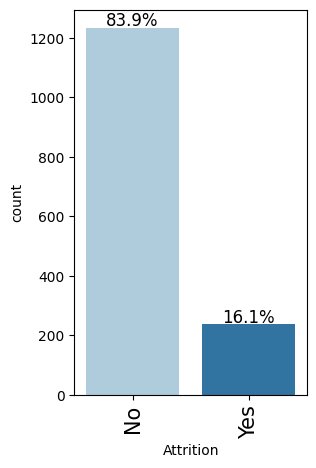

In [103]:
labeled_barplot(data, "Attrition", perc=True)

* 16% of the data points represent the employees who are going to attrite.

## Bivariate Analysis

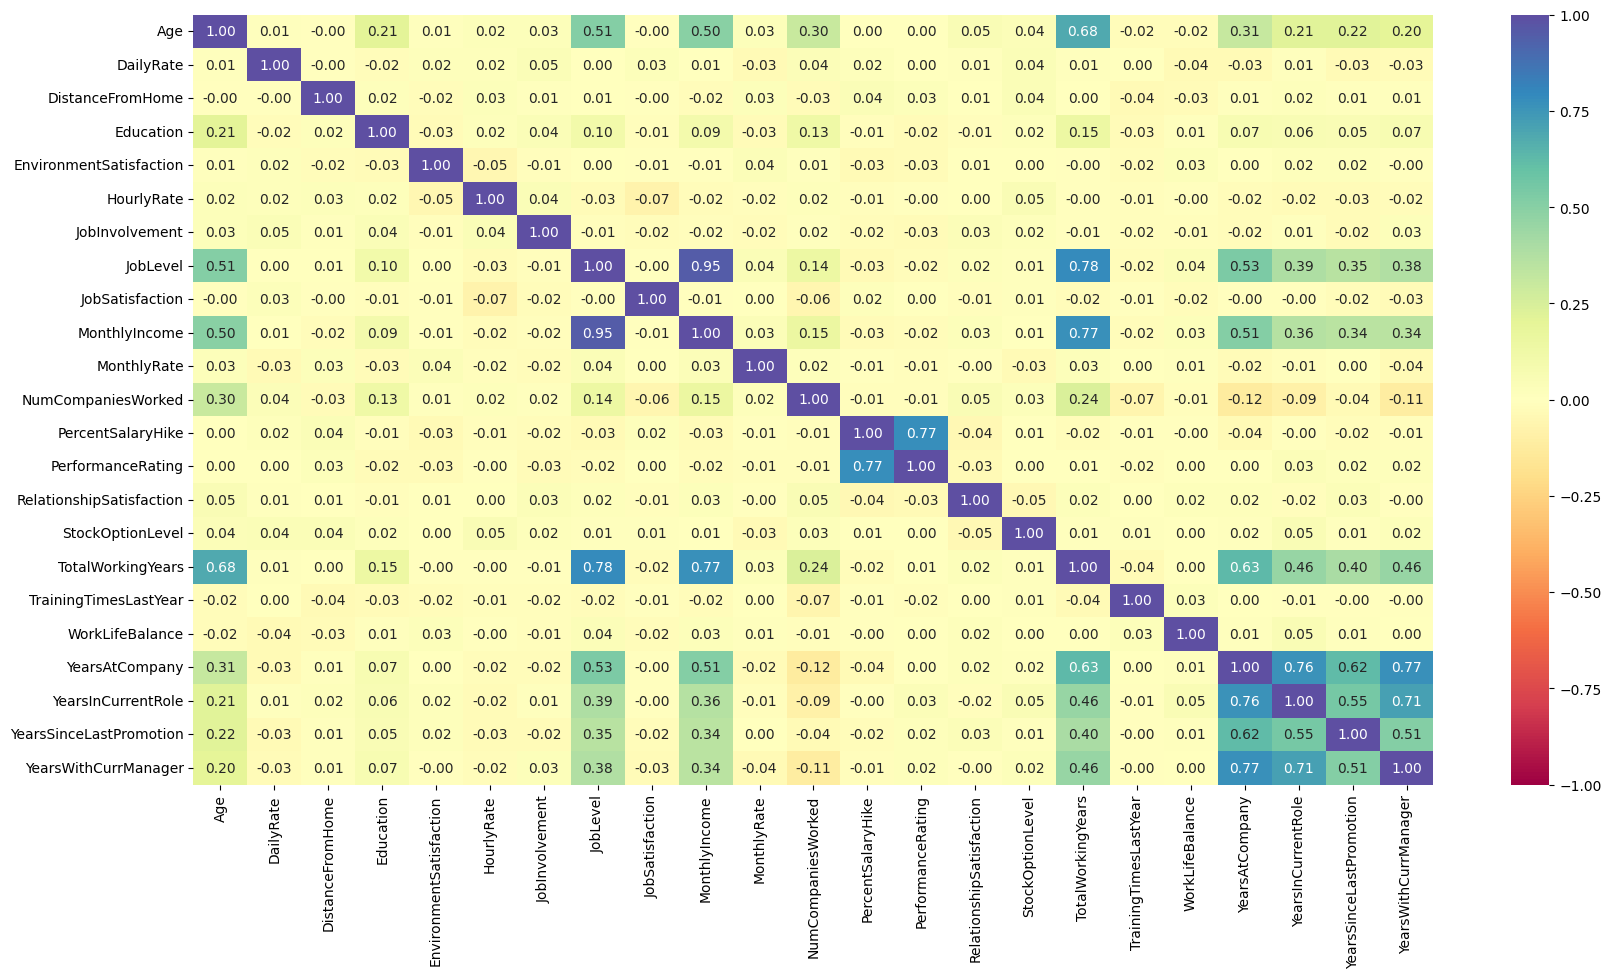

In [104]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

In this project, it is evident that there are correlations among certain variables, which align with the expected relationships. For instance, the variable TotalWorkingYears shows a strong positive correlation with Job Level, indicating that individuals tend to attain higher job levels as they accumulate more years of work experience. On the other hand, variables such as HourlyRate, DailyRate, and MonthlyRate exhibit no significant correlations with each other, posing challenges in understanding the underlying meanings and implications of these variables. Notably, MonthlyIncome demonstrates a substantial positive correlation with Job Level, suggesting that employees with higher job levels tend to have higher monthly incomes. Additionally, Age shows positive correlations with both Job Level and Education, indicating that older employees tend to possess higher educational qualifications and occupy higher job levels. Surprisingly, Work-life Balance exhibits no significant correlations with any of the numeric variables, which warrants further exploration to better comprehend its relationship with other factors. These observations shed light on the interdependencies among the variables in the project, contributing valuable insights for its analysis and interpretation.

In [105]:
sns.pairplot(data,hue='Attrition')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

The dataset exhibits diverse distributions among the variables with respect to attrition, suggesting the need for further investigation.

### Attrition vs Earnings of employee

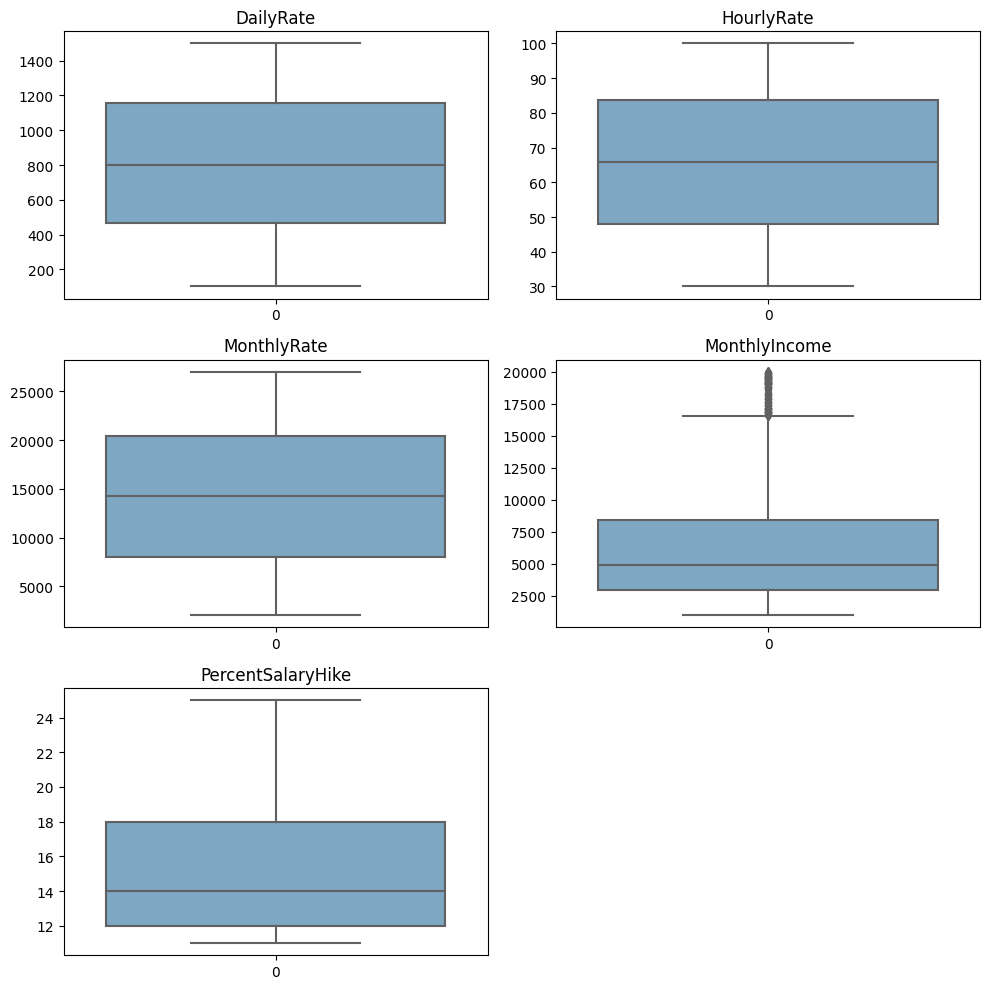

In [107]:
cols = data[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome','PercentSalaryHike']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In this research project, it has been observed that employees with lower daily rates and lower monthly wages tend to have a higher likelihood of attrition. Interestingly, the monthly rate and hourly rate do not appear to have a significant impact on attrition. Additionally, it has been noted that a lower salary hike is also associated with a higher tendency for attrition. These findings shed light on the relationship between various compensation factors and the attrition rate within the organization.

### Attrition vs Years working in company

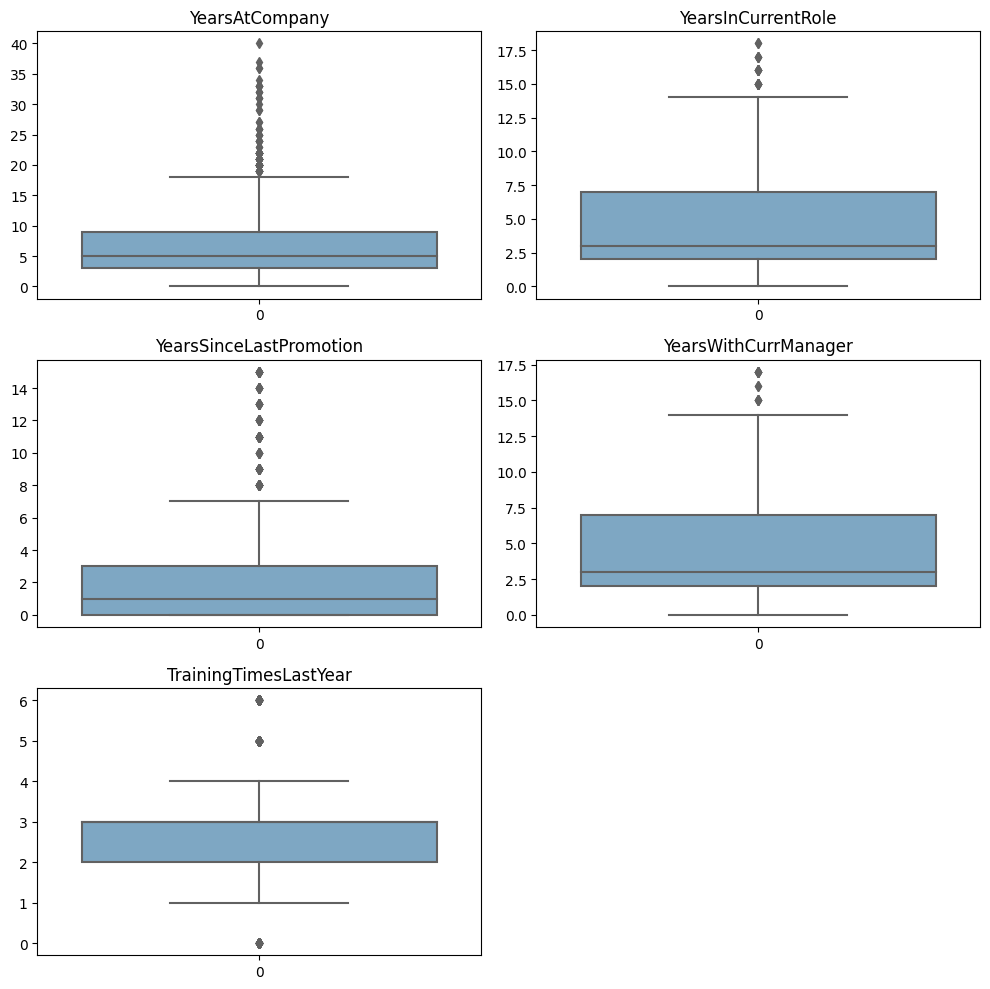

In [108]:
cols = data[['YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','TrainingTimesLastYear']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In the context of this significant project, it is evident that employees who have a shorter tenure in a company, current role, or working under a specific manager tend to have a higher likelihood of attrition. This observation suggests that the duration of an employee's association with these factors plays a crucial role in their decision to leave the organization. Furthermore, it appears that training programs offered to employees do not significantly influence the attrition rate. These findings provide valuable insights into the factors influencing employee attrition and highlight the importance of considering tenure and managerial relationships when addressing attrition-related challenges within an organization.

### Attrition vs Previous job roles

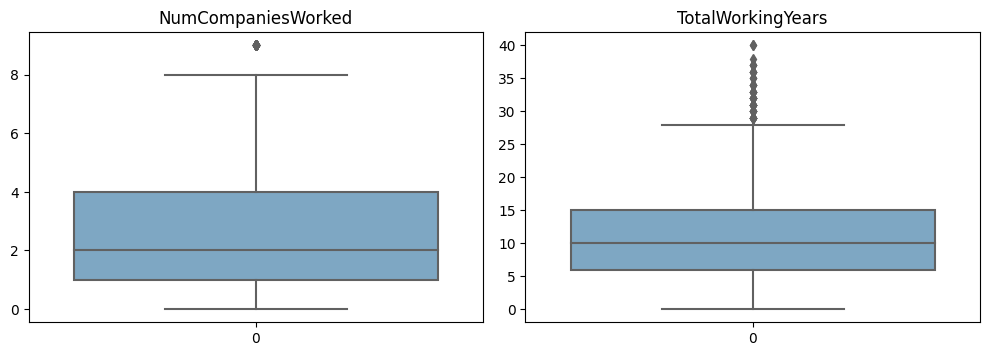

In [109]:
cols = data[['NumCompaniesWorked','TotalWorkingYears']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In the context of this significant project, it is observed that employees who have a history of working in multiple companies tend to exhibit a higher tendency to switch jobs, resulting in attrition. This suggests that a greater number of previous employments is associated with an increased likelihood of job changes. Additionally, it is noticed that employees who experience attrition typically possess fewer years of overall work experience. This implies that individuals with lesser professional experience are more prone to leaving their current positions. These observations shed light on the relationship between an employee's job history, years of experience, and the likelihood of attrition.

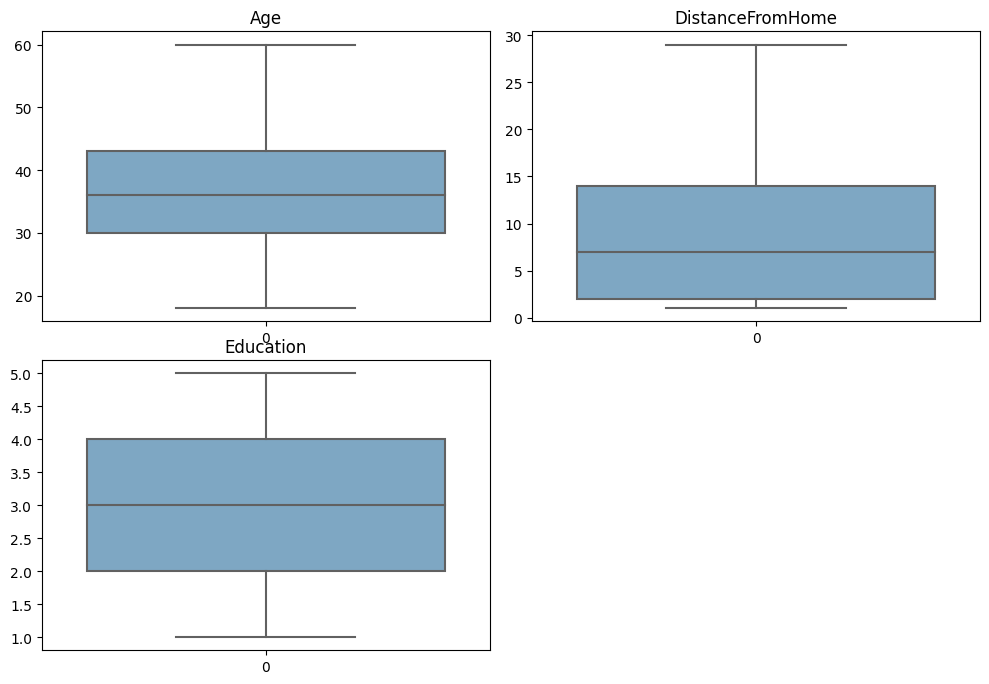

In [110]:
cols = data[['Age','DistanceFromHome','Education']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

It is observed that there is a relationship between the distance employees have to travel from their homes and their attrition rate. Specifically, it is noticed that employees who have to commute longer distances are more likely to attrite from the organization. This finding highlights the potential impact of commuting distance on employee retention and suggests that organizations should consider addressing this factor to mitigate attrition. Additionally, the analysis reveals no significant differences in terms of age and education between employees who attrite and those who do not. These findings imply that factors other than age and education play a more prominent role in employee attrition within the studied context. The project underscores the importance of understanding and addressing the challenges related to commuting distance to enhance employee retention and overall organizational success.

Attrition            No  Yes   All
BusinessTravel                    
All                1233  237  1470
Travel_Rarely       887  156  1043
Travel_Frequently   208   69   277
Non-Travel          138   12   150
------------------------------------------------------------------------------------------------------------------------


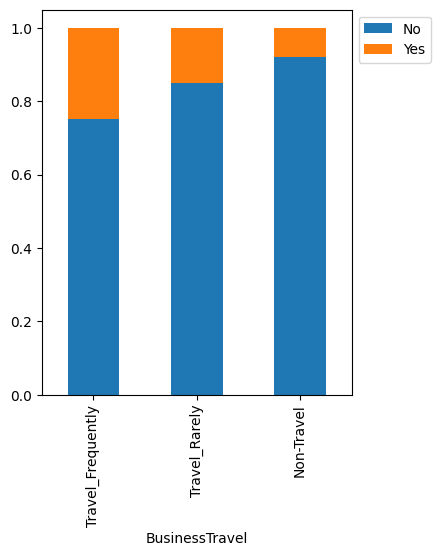

In [111]:
stacked_barplot(data, "BusinessTravel", "Attrition")

It has been observed that there is a positive association between the frequency of travel and the attrition rate among employees. This finding suggests that as the frequency of travel increases, the likelihood of employees leaving the organization also increases. Specifically, the analysis indicates that employees who travel frequently have an approximate attrition rate of 22%. This information highlights the potential impact of travel frequency on employee retention and serves as a valuable insight for organizations aiming to mitigate attrition risks related to travel.

Attrition                 No  Yes   All
Department                             
All                     1233  237  1470
Research & Development   828  133   961
Sales                    354   92   446
Human Resources           51   12    63
------------------------------------------------------------------------------------------------------------------------


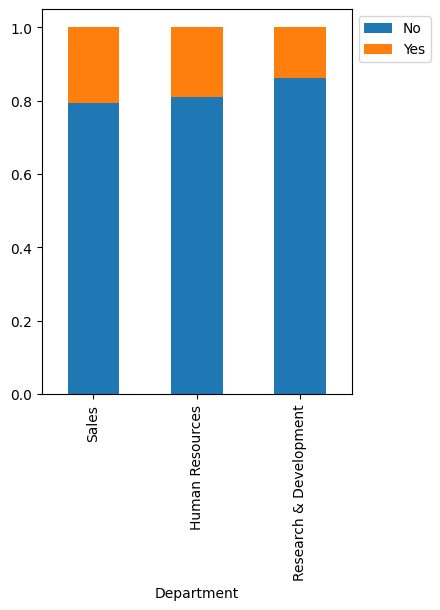

In [112]:
stacked_barplot(data, "Department", "Attrition")

It was observed that a significant portion of the workforce is employed in the R&D department. Surprisingly, the probability of attrition was found to be the lowest in this department. On the other hand, the Sales and HR departments exhibited similar probabilities of attrition. These findings shed light on the varying attrition patterns across different departments within the organization.

Attrition           No  Yes   All
EducationField                   
All               1233  237  1470
Life Sciences      517   89   606
Medical            401   63   464
Marketing          124   35   159
Technical Degree   100   32   132
Other               71   11    82
Human Resources     20    7    27
------------------------------------------------------------------------------------------------------------------------


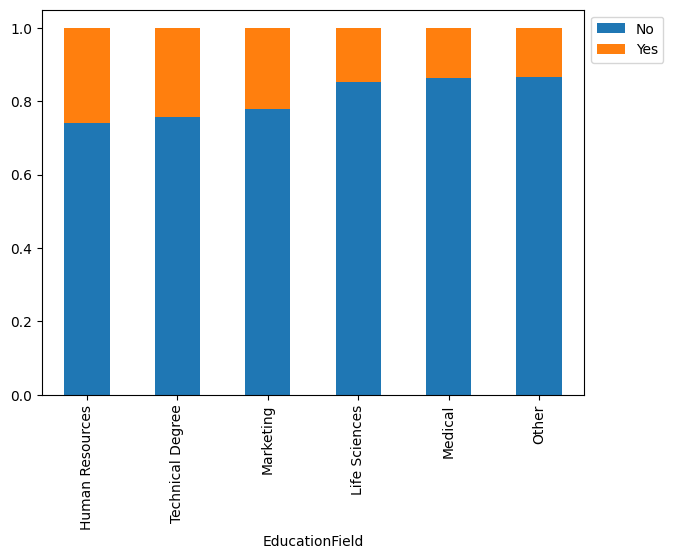

In [113]:
stacked_barplot(data,"EducationField","Attrition")

It is observed that a significant portion, specifically 25%, of employees with a background in human resources tend to leave the organization, indicating a considerable attrition rate within this particular department. Furthermore, the probability of attrition is also observed to be high among employees holding degrees in marketing and technical fields. These findings highlight the potential challenges and factors contributing to attrition in these specific areas of expertise, which could be of significant importance for organizations seeking to understand and address workforce retention issues.

Attrition                  No  Yes   All
EnvironmentSatisfaction                 
All                      1233  237  1470
1                         212   72   284
3                         391   62   453
4                         386   60   446
2                         244   43   287
------------------------------------------------------------------------------------------------------------------------


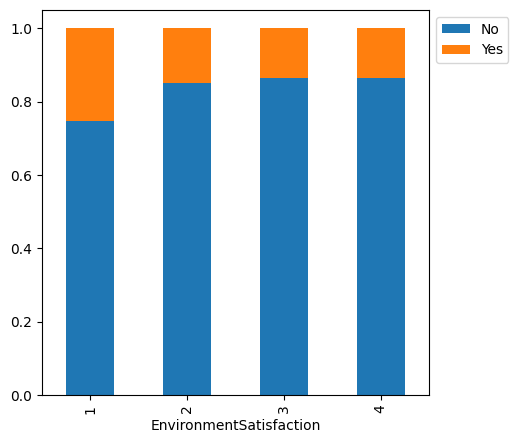

In [114]:
stacked_barplot(data,"EnvironmentSatisfaction","Attrition")

It is observed that employees who express lower levels of satisfaction with their work environments are more likely to leave the organization. It is estimated that there is approximately a 40% probability of attrition among employees who give low ratings for environment satisfaction. These findings emphasize the potential impact of work environment satisfaction on employee retention and suggest that organizations should consider addressing and improving work environment factors to mitigate the risk of attrition.

Attrition         No  Yes   All
JobInvolvement                 
All             1233  237  1470
3                743  125   868
2                304   71   375
1                 55   28    83
4                131   13   144
------------------------------------------------------------------------------------------------------------------------


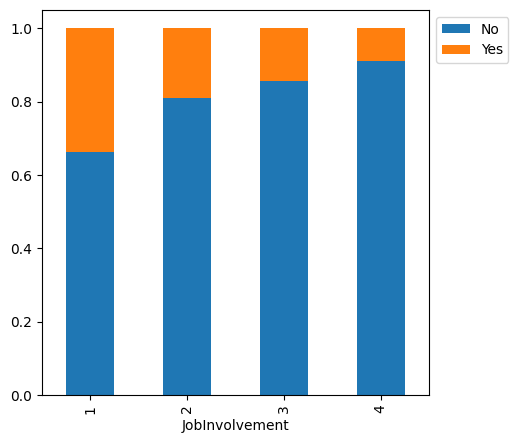

In [115]:
stacked_barplot(data,"JobInvolvement","Attrition")

It is observed that job involvement appears to be a significant factor in predicting attrition. The findings indicate that employees with higher job involvement are more likely to remain with the organization and not experience attrition. On the other hand, employees who express dissatisfaction with their job involvement, particularly those who rated their job involvement as 0 or 1, have approximately a 55% probability of attrition. Further investigation into the collection process and methodology used to measure job involvement will provide additional insights into the significance and interpretation of this variable. By gaining a deeper understanding of how this variable was assessed, we can enhance our understanding of its impact on attrition and potentially uncover further meaningful findings.

Attrition    No  Yes   All
JobLevel                  
All        1233  237  1470
1           400  143   543
2           482   52   534
3           186   32   218
4           101    5   106
5            64    5    69
------------------------------------------------------------------------------------------------------------------------


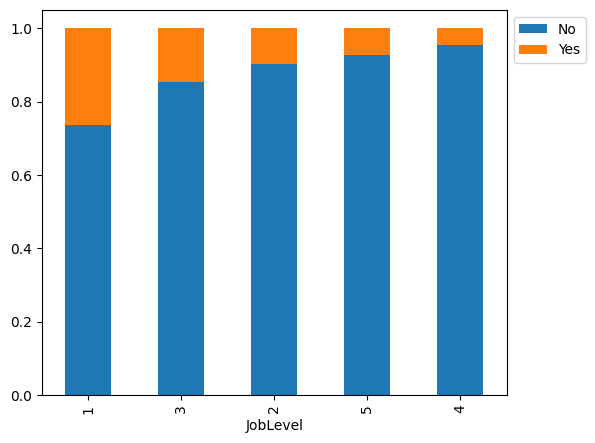

In [116]:
stacked_barplot(data,"JobLevel","Attrition")

* The trend is not very clear here, but it is visible that people at lower job levels are more likely to attrite.

Attrition                    No  Yes   All
JobRole                                   
All                        1233  237  1470
Laboratory Technician       197   62   259
Sales Executive             269   57   326
Research Scientist          245   47   292
Sales Representative         50   33    83
Human Resources              40   12    52
Manufacturing Director      135   10   145
Healthcare Representative   122    9   131
Manager                      97    5   102
Research Director            78    2    80
------------------------------------------------------------------------------------------------------------------------


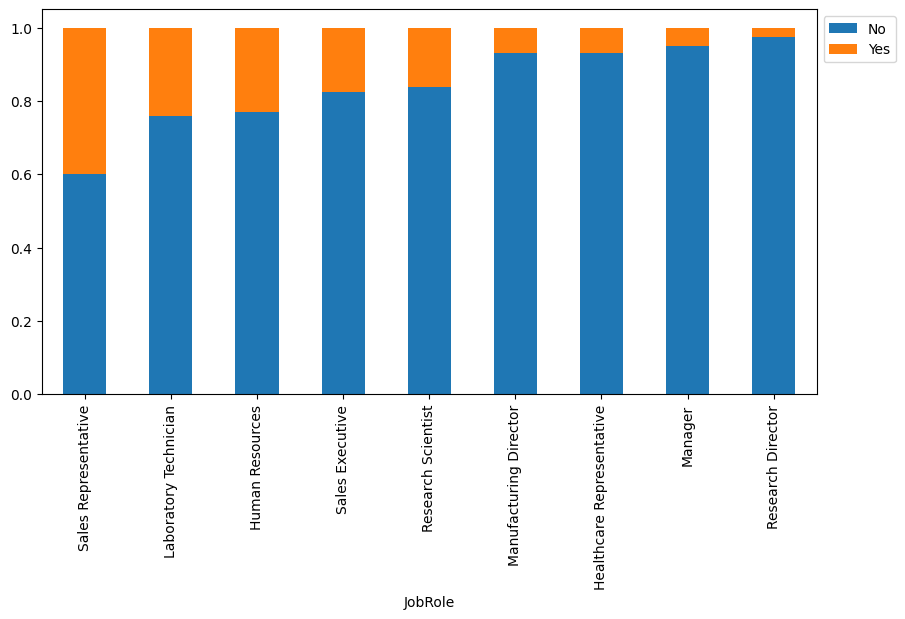

In [117]:
stacked_barplot(data,"JobRole","Attrition")

It is observed that Sales Executives exhibit a high attrition probability, exceeding 40%. This implies that there is a significant likelihood of Sales Executives leaving the organization. Similarly, Laboratory Technicians and Human Resource personnel also display high attrition probabilities, indicating a potential risk of attrition within these roles. On the other hand, Research Directors, Manufacturing Directors, Healthcare Representatives, and Managers demonstrate attrition probabilities considerably lower than the average rate of 16%. These findings provide valuable insights into the attrition trends across different job positions, highlighting the need for targeted strategies and interventions to mitigate attrition risks, particularly among Sales Executives, Laboratory Technicians, and Human Resource personnel.

Attrition          No  Yes   All
JobSatisfaction                 
All              1233  237  1470
3                 369   73   442
1                 223   66   289
4                 407   52   459
2                 234   46   280
------------------------------------------------------------------------------------------------------------------------


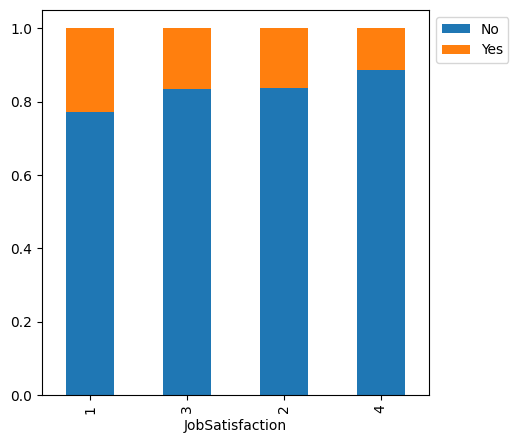

In [118]:
stacked_barplot(data,"JobSatisfaction","Attrition")

It is observed that there is an inverse relationship between job satisfaction and attrition probability. Specifically, as job satisfaction increases, the likelihood of attrition decreases. This finding aligns with common intuition, as employees who are more satisfied with their jobs tend to have a lower propensity to leave the organization. However, a peculiar observation arises from the data, where individuals who rate their job satisfaction as 2 and 3 exhibit almost similar attrition probabilities. This observation raises questions and highlights the need for further investigation to understand the underlying factors influencing attrition for individuals with these particular satisfaction ratings.

Attrition        No  Yes   All
MaritalStatus                 
All            1233  237  1470
Single          350  120   470
Married         589   84   673
Divorced        294   33   327
------------------------------------------------------------------------------------------------------------------------


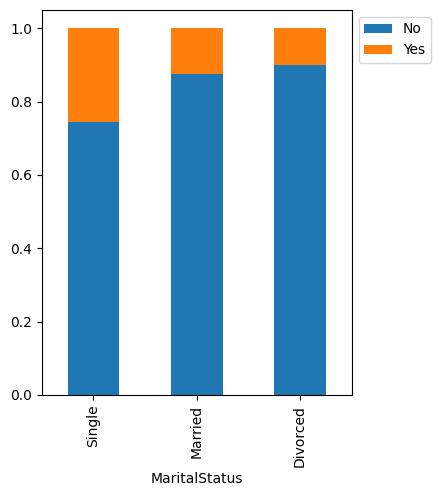

In [119]:
stacked_barplot(data,"MaritalStatus","Attrition")

It is observed that employees who are single exhibit a higher attrition rate compared to those who are married or divorced. This finding may be attributed to the fact that single employees are generally younger and more inclined to explore different job opportunities. The possibility of exploring various job options could contribute to a higher likelihood of attrition among single employees. This observation sheds light on the relationship between marital status, age, and attrition rates, highlighting the potential influence of personal factors on employees' career decisions.

Attrition    No  Yes   All
OverTime                  
All        1233  237  1470
Yes         289  127   416
No          944  110  1054
------------------------------------------------------------------------------------------------------------------------


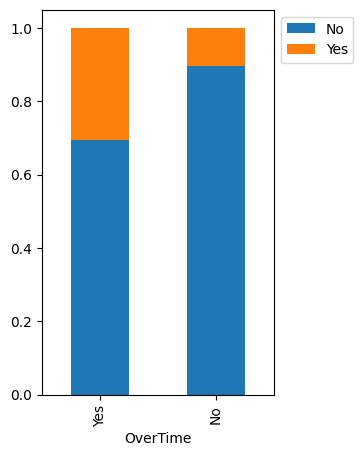

In [120]:
stacked_barplot(data,"OverTime","Attrition")

It is observed that there is a correlation between employee overtime and attrition. Specifically, it has been noted that employees who work overtime are more likely to experience attrition. The data analysis reveals that there is approximately a 35% probability of attrition among employees who engage in overtime work. This finding highlights the potential impact of extended working hours on employee retention and emphasizes the need for further investigation into the underlying factors contributing to attrition in relation to overtime.

Attrition                   No  Yes   All
RelationshipSatisfaction                 
All                       1233  237  1470
3                          388   71   459
4                          368   64   432
1                          219   57   276
2                          258   45   303
------------------------------------------------------------------------------------------------------------------------


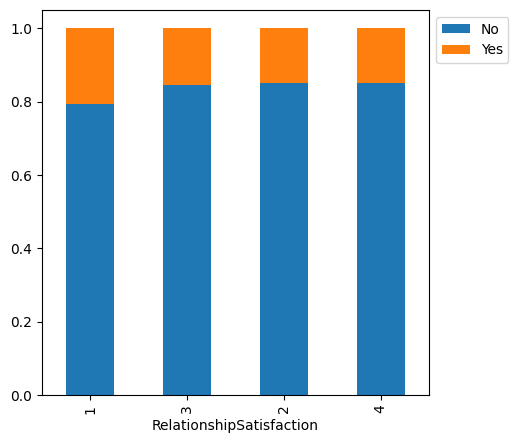

In [121]:
stacked_barplot(data,"RelationshipSatisfaction","Attrition")

It is observed that a lower rating for relationship satisfaction is associated with a higher probability of attrition. However, to gain a deeper understanding, it is necessary to delve into the specific relationships that are indicated by this variable. Further investigation is required to identify and analyze the particular aspects or characteristics of relationships that contribute to the likelihood of attrition. This research aims to explore these factors and provide valuable insights into the relationship dynamics that influence attrition rates.

Attrition           No  Yes   All
StockOptionLevel                 
All               1233  237  1470
0                  477  154   631
1                  540   56   596
3                   70   15    85
2                  146   12   158
------------------------------------------------------------------------------------------------------------------------


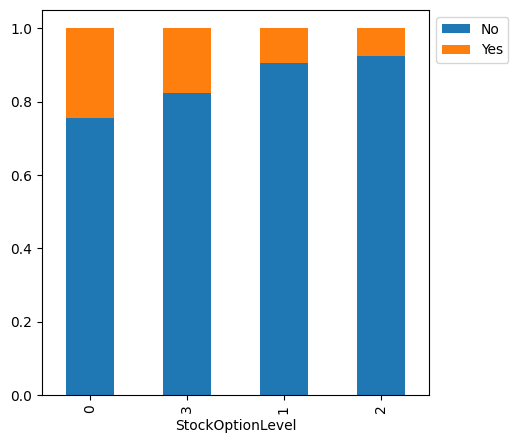

In [122]:
stacked_barplot(data,"StockOptionLevel","Attrition")

It has been observed that a significant proportion of employees, approximately 22%, who have been granted the highest and lowest stock options, tend to have a higher attrition rate compared to others. This finding highlights the importance for the company to conduct further investigations into the reasons behind the attrition among employees with the highest stock options. This presents an opportunity for the company to re-evaluate its stock policy and consider potential modifications or improvements that could address the factors contributing to attrition among employees in this particular group. By addressing these concerns, the company can potentially improve retention rates and enhance employee satisfaction and engagement.

Attrition          No  Yes   All
WorkLifeBalance                 
All              1233  237  1470
3                 766  127   893
2                 286   58   344
4                 126   27   153
1                  55   25    80
------------------------------------------------------------------------------------------------------------------------


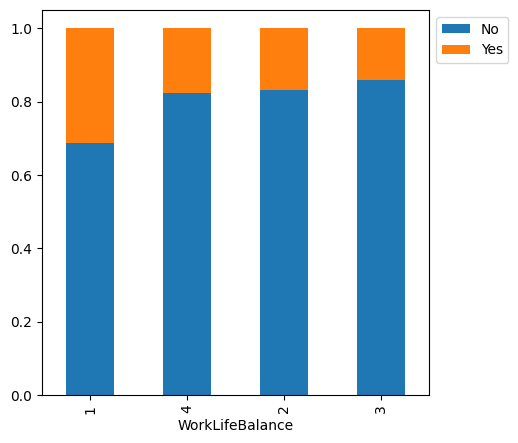

In [123]:
stacked_barplot(data,"WorkLifeBalance","Attrition")

Preempting attrition risk among employees involves considering various factors that may contribute to their decision to leave the organization. One such significant factor is the work-life balance rating, which has been found to have a direct impact on attrition. Identifying employees with low work-life balance ratings becomes crucial in order to proactively address their concerns and potentially mitigate attrition risks. By acknowledging and prioritizing the importance of work-life balance, organizations can take proactive measures to improve employee satisfaction, well-being, and retention, thus fostering a positive work environment.